# Home credit group analysis Part 1

This is a first part of data analysis on a Home Credit Group dataset. This part concentrates on preprocessing and aggregating dataset for data analysis and model training.  In addition, missing values, outliers and other anomalies are checked for each table.

- Objectives 
    1. Data preprocessing and checking data quality. 
    2. Data aggregation for historical 
    3. Provide preprocessed data for exploratory data analysis and model training.


**Contents**

1. [Importing packages and data](#1.-Importing-packages-and-data)

    1.1 [Database description](#1.1-Database-description)


2. [Preprocessing](#2.-Preprocessing)
    
    2.1 [Current application data](#2.1-Current-application-data)
    
    2.2 [Previous applications](#2.2-Previous-applications)
    
    2.3 [Installment data](#2.3-Installment-data)
    
    2.4 [Credit card balance](#2.4-Credit-card-balance)
    
    2.5 [Previous point of sales](#2.5-Previous-point-of-sales)
    
    2.6 [Credit bureau data](#2.6-Credit-bureau-data)


3. [Exporting preprocessed data](#3.-Exporting-preprocessed-data)
    



***

## 1. Importing packages and data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import missingno as msno

sns.set(rc={"figure.figsize": (10, 6)})
sklearn.set_config(transform_output="pandas")

In [2]:
%load_ext nb_black
%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
%load_ext autoreload
%autoreload 2
import preprocessingtools
import edatools
import commonpipeline
import applicationpreprocess
import previouspreprocess
import bureaupreprocess
import installmentpreprocess
import creditpreprocess
import pospreprocess

<IPython.core.display.Javascript object>

In [4]:
df_pos = pd.read_csv(
    "../../../home-credit-default-risk/POS_CASH_balance.csv",
    index_col=False,
)
df_prev = pd.read_csv(
    "../../../home-credit-default-risk/previous_application.csv",
    index_col=False,
)
df_train = pd.read_csv(
    "../../../home-credit-default-risk/application_train.csv",
    index_col=False,
)
df_test = pd.read_csv(
    "../../../home-credit-default-risk/application_test.csv",
    index_col=False,
)
df_bureau = pd.read_csv(
    "../../../home-credit-default-risk/bureau.csv",
    index_col=False,
)
df_bureau_bal = pd.read_csv(
    "../../../home-credit-default-risk/bureau_balance.csv",
    index_col=False,
)
df_credit_bal = pd.read_csv(
    "../../../home-credit-default-risk/credit_card_balance.csv",
    index_col=False,
)
df_inst = pd.read_csv(
    "../../../home-credit-default-risk/installments_payments.csv",
    index_col=False,
)

<IPython.core.display.Javascript object>

### 1.1 Database description

In [5]:
edatools.dataframe_info(df_pos)

Shape: (10001358, 8)


,DataType,#Nulls,%Nulls,#Uniques,Min,Mean,Median,Max,Std,top10 value,top10 count,top10 ratio,top10 values,count of top10 values,proportion of top10 values
SK_ID_PREV,int64,0,0.000000,936325,1000001.0,1.903217e+06,1896565.0,2843499.0,535846.530722,0,0,0,"[1856103, 2706683, 1617536, 1364606, 1057553, ...","[96, 96, 96, 96, 96, 96, 96, 96, 96, 96]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
SK_ID_CURR,int64,0,0.000000,337252,100001.0,2.784039e+05,278654.0,456255.0,102763.745090,0,0,0,"[265042, 172612, 309133, 127659, 185185, 19758...","[295, 247, 246, 245, 245, 245, 244, 239, 237, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
MONTHS_BALANCE,int64,0,0.000000,96,-96.0,-3.501259e+01,-28.0,-1.0,26.066570,0,0,0,"[-10, -11, -9, -12, -8, -13, -7, -14, -6, -15]","[216441, 216023, 215558, 214716, 214149, 21095...","[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0..."
CNT_INSTALMENT,float64,26071,0.002607,73,1.0,1.708965e+01,12.0,92.0,11.995056,0,0,0,"[12.0, 24.0, 10.0, 6.0, 18.0, 36.0, 8.0, 48.0,...","[2496845, 1517472, 1243449, 1065500, 727394, 5...","[0.25, 0.15, 0.12, 0.11, 0.07, 0.06, 0.03, 0.0..."
CNT_INSTALMENT_FUTURE,float64,26087,0.002608,79,0.0,1.048384e+01,7.0,85.0,11.109058,0,0,0,"[0.0, 6.0, 4.0, 5.0, 3.0, 2.0, 1.0, 10.0, 8.0,...","[1185960, 614058, 613632, 600295, 582007, 5471...","[0.12, 0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.0..."
NAME_CONTRACT_STATUS,object,0,0.000000,9,NaN,NaN,NaN,NaN,NaN,0,0,0,"['Active', 'Completed', 'Signed', 'Demand', 'R...","[9151119, 744883, 87260, 7065, 5461, 4917, 636...","[0.91, 0.07, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
SK_DPD,int64,0,0.000000,3400,0.0,1.160693e+01,0.0,4231.0,132.714043,0,0,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[9706131, 21872, 17358, 14403, 12350, 11046, 9...","[0.97, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
SK_DPD_DEF,int64,0,0.000000,2307,0.0,6.544684e-01,0.0,3595.0,32.762491,0,0,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[9887389, 22134, 14690, 11652, 9528, 8031, 662...","[0.99, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


<IPython.core.display.Javascript object>

In [6]:
edatools.dataframe_info(df_train)

Shape: (307511, 122)


,DataType,#Nulls,%Nulls,#Uniques,Min,Mean,Median,Max,Std,top10 value,top10 count,top10 ratio,top10 values,count of top10 values,proportion of top10 values
SK_ID_CURR,int64,0,0.000000,307511,100002.0,278180.518577,278202.0,456255.0,102790.175348,0,0,0,"[100002, 337664, 337661, 337660, 337659, 33765...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
TARGET,int64,0,0.000000,2,0.0,0.080729,0.0,1.0,0.272419,0,0,0,"[0, 1]","[282686, 24825]","[0.92, 0.08]"
NAME_CONTRACT_TYPE,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,0,0,0,"['Cash loans', 'Revolving loans']","[278232, 29279]","[0.9, 0.1]"
CODE_GENDER,object,0,0.000000,3,NaN,NaN,NaN,NaN,NaN,0,0,0,"['F', 'M', 'XNA']","[202448, 105059, 4]","[0.66, 0.34, 0.0]"
FLAG_OWN_CAR,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,0,0,0,"['N', 'Y']","[202924, 104587]","[0.66, 0.34]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64,41519,0.135016,9,0.0,0.007000,0.0,9.0,0.110757,0,0,0,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 8.0]","[264503, 1292, 106, 45, 26, 9, 8, 2, 1]","[0.86, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
AMT_REQ_CREDIT_BUREAU_WEEK,float64,41519,0.135016,9,0.0,0.034362,0.0,8.0,0.204685,0,0,0,"[0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 5.0, 8.0, 7.0]","[257456, 8208, 199, 58, 34, 20, 10, 5, 2]","[0.84, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
AMT_REQ_CREDIT_BUREAU_MON,float64,41519,0.135016,24,0.0,0.267395,0.0,27.0,0.916002,0,0,0,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, ...","[222233, 33147, 5386, 1991, 1076, 602, 343, 29...","[0.72, 0.11, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0, 0..."
AMT_REQ_CREDIT_BUREAU_QRT,float64,41519,0.135016,11,0.0,0.265474,0.0,261.0,0.794056,0,0,0,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 7.0, ...","[215417, 33862, 14412, 1717, 476, 64, 28, 7, 7...","[0.7, 0.11, 0.05, 0.01, 0.0, 0.0, 0.0, 0.0, 0...."


<IPython.core.display.Javascript object>

In [7]:
edatools.dataframe_info(df_test)

Shape: (48744, 121)


,DataType,#Nulls,%Nulls,#Uniques,Min,Mean,Median,Max,Std,top10 value,top10 count,top10 ratio,top10 values,count of top10 values,proportion of top10 values
SK_ID_CURR,int64,0,0.000000,48744,100001.0,277796.676350,277549.0,456250.0,103169.547296,0,0,0,"[100001, 336464, 336413, 336418, 336426, 33642...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
NAME_CONTRACT_TYPE,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,0,0,0,"['Cash loans', 'Revolving loans']","[48305, 439]","[0.99, 0.01]"
CODE_GENDER,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,0,0,0,"['F', 'M']","[32678, 16066]","[0.67, 0.33]"
FLAG_OWN_CAR,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,0,0,0,"['N', 'Y']","[32311, 16433]","[0.66, 0.34]"
FLAG_OWN_REALTY,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,0,0,0,"['Y', 'N']","[33658, 15086]","[0.69, 0.31]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64,6049,0.124097,3,0.0,0.001803,0.0,2.0,0.046132,0,0,0,"[0.0, 1.0, 2.0]","[42625, 63, 7]","[0.87, 0.0, 0.0]"
AMT_REQ_CREDIT_BUREAU_WEEK,float64,6049,0.124097,3,0.0,0.002787,0.0,2.0,0.054037,0,0,0,"[0.0, 1.0, 2.0]","[42579, 113, 3]","[0.87, 0.0, 0.0]"
AMT_REQ_CREDIT_BUREAU_MON,float64,6049,0.124097,7,0.0,0.009299,0.0,6.0,0.110924,0,0,0,"[0.0, 1.0, 2.0, 3.0, 6.0, 4.0, 5.0]","[42341, 324, 23, 4, 1, 1, 1]","[0.87, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0]"
AMT_REQ_CREDIT_BUREAU_QRT,float64,6049,0.124097,8,0.0,0.546902,0.0,7.0,0.693305,0,0,0,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 6.0]","[23559, 15573, 2998, 495, 57, 11, 1, 1]","[0.48, 0.32, 0.06, 0.01, 0.0, 0.0, 0.0, 0.0]"


<IPython.core.display.Javascript object>

In [8]:
edatools.dataframe_info(df_prev)

Shape: (1670214, 37)


,DataType,#Nulls,%Nulls,#Uniques,Min,Mean,Median,Max,Std,top10 value,top10 count,top10 ratio,top10 values,count of top10 values,proportion of top10 values
SK_ID_PREV,int64,0,0.000000e+00,1670214,1.000001e+06,1.923089e+06,1.923110e+06,2845382.000,532597.958696,0,0,0,"[2030495, 1035848, 1526498, 2148893, 2437429, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
SK_ID_CURR,int64,0,0.000000e+00,338857,1.000010e+05,2.783572e+05,2.787145e+05,456255.000,102814.823849,0,0,0,"[187868, 265681, 173680, 242412, 206783, 15636...","[77, 73, 72, 68, 67, 66, 64, 64, 63, 62]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
NAME_CONTRACT_TYPE,object,0,0.000000e+00,4,NaN,NaN,NaN,NaN,NaN,0,0,0,"['Cash loans', 'Consumer loans', 'Revolving lo...","[747553, 729151, 193164, 346]","[0.45, 0.44, 0.12, 0.0]"
AMT_ANNUITY,float64,372235,2.228667e-01,357959,0.000000e+00,1.595512e+04,1.125000e+04,418058.145,14782.137335,0,0,0,"[2250.0, 11250.0, 6750.0, 9000.0, 22500.0, 450...","[31865, 13974, 13442, 12496, 11903, 10597, 717...","[0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0,..."
AMT_APPLICATION,float64,0,0.000000e+00,93885,0.000000e+00,1.752339e+05,7.104600e+04,6905160.000,292779.762387,0,0,0,"[0.0, 45000.0, 225000.0, 135000.0, 450000.0, 9...","[392402, 47831, 43543, 40678, 38905, 29367, 24...","[0.23, 0.03, 0.03, 0.02, 0.02, 0.02, 0.01, 0.0..."
AMT_CREDIT,float64,1,5.987257e-07,86803,0.000000e+00,1.961140e+05,8.054100e+04,6905160.000,318574.616546,0,0,0,"[0.0, 45000.0, 225000.0, 450000.0, 135000.0, 1...","[336768, 35051, 21094, 19954, 18720, 17085, 13...","[0.2, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01..."
AMT_DOWN_PAYMENT,float64,895844,5.363648e-01,29278,-9.000000e-01,6.697402e+03,1.638000e+03,3060045.000,20921.495410,0,0,0,"[0.0, 4500.0, 9000.0, 13500.0, 22500.0, 6750.0...","[369854, 21241, 14747, 9655, 8165, 7709, 6241,...","[0.22, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0..."
AMT_GOODS_PRICE,float64,385515,2.308177e-01,93885,0.000000e+00,2.278473e+05,1.123200e+05,6905160.000,315396.557937,0,0,0,"[45000.0, 225000.0, 135000.0, 450000.0, 90000....","[47831, 43549, 40666, 38926, 29367, 24736, 205...","[0.03, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, 0.0..."
WEEKDAY_APPR_PROCESS_START,object,0,0.000000e+00,7,NaN,NaN,NaN,NaN,NaN,0,0,0,"['TUESDAY', 'WEDNESDAY', 'MONDAY', 'FRIDAY', '...","[255118, 255010, 253557, 252048, 249099, 24063...","[0.15, 0.15, 0.15, 0.15, 0.15, 0.14, 0.1]"
HOUR_APPR_PROCESS_START,int64,0,0.000000e+00,24,0.000000e+00,1.248418e+01,1.200000e+01,23.000,3.334028,0,0,0,"[11, 12, 10, 13, 14, 15, 9, 16, 17, 8]","[192728, 185980, 181690, 172256, 157711, 14296...","[0.12, 0.11, 0.11, 0.1, 0.09, 0.09, 0.08, 0.07..."


<IPython.core.display.Javascript object>

In [9]:
edatools.dataframe_info(df_bureau)

Shape: (1716428, 17)


,DataType,#Nulls,%Nulls,#Uniques,Min,Mean,Median,Max,Std,top10 value,top10 count,top10 ratio,top10 values,count of top10 values,proportion of top10 values
SK_ID_CURR,int64,0,0.000000,305811,100001.000,2.782149e+05,278055.0,4.562550e+05,1.029386e+05,0,0,0,"[120860, 169704, 318065, 251643, 425396, 29580...","[116, 94, 78, 61, 60, 59, 58, 57, 56, 55]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
SK_ID_BUREAU,int64,0,0.000000,1716428,5000000.000,5.924434e+06,5926303.5,6.843457e+06,5.322657e+05,0,0,0,"[5714462, 6758530, 6758496, 6758495, 6758494, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
CREDIT_ACTIVE,object,0,0.000000,4,NaN,NaN,NaN,NaN,NaN,0,0,0,"['Closed', 'Active', 'Sold', 'Bad debt']","[1079273, 630607, 6527, 21]","[0.63, 0.37, 0.0, 0.0]"
CREDIT_CURRENCY,object,0,0.000000,4,NaN,NaN,NaN,NaN,NaN,0,0,0,"['currency 1', 'currency 2', 'currency 3', 'cu...","[1715020, 1224, 174, 10]","[1.0, 0.0, 0.0, 0.0]"
DAYS_CREDIT,int64,0,0.000000,2923,-2922.000,-1.142108e+03,-987.0,0.000000e+00,7.951649e+02,0,0,0,"[-364, -336, -273, -357, -343, -315, -371, -36...","[1330, 1248, 1238, 1218, 1203, 1202, 1196, 119...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
CREDIT_DAY_OVERDUE,int64,0,0.000000,942,0.000,8.181666e-01,0.0,2.792000e+03,3.654443e+01,0,0,0,"[0, 30, 60, 8, 13, 9, 7, 14, 17, 11]","[1712211, 311, 126, 103, 103, 93, 92, 91, 77, 75]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
DAYS_CREDIT_ENDDATE,float64,105553,0.061496,14096,-42060.000,5.105174e+02,-330.0,3.119900e+04,4.994220e+03,0,0,0,"[0.0, 3.0, -7.0, 1.0, -14.0, -10.0, 4.0, -2.0,...","[883, 845, 837, 830, 787, 782, 777, 772, 771, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
DAYS_ENDDATE_FACT,float64,633653,0.369170,2917,-42023.000,-1.017437e+03,-897.0,0.000000e+00,7.140106e+02,0,0,0,"[-329.0, -273.0, -301.0, -91.0, -84.0, -154.0,...","[811, 794, 791, 785, 783, 783, 782, 778, 778, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
AMT_CREDIT_MAX_OVERDUE,float64,1124488,0.655133,68251,0.000,3.825418e+03,0.0,1.159872e+08,2.060316e+05,0,0,0,"[0.0, 1440.0, 225.0, 45.0, 4.5, 90.0, 4500.0, ...","[470650, 688, 405, 377, 315, 222, 220, 192, 19...","[0.27, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
CNT_CREDIT_PROLONG,int64,0,0.000000,10,0.000,6.410406e-03,0.0,9.000000e+00,9.622391e-02,0,0,0,"[0, 1, 2, 3, 4, 5, 9, 6, 8, 7]","[1707314, 7620, 1222, 191, 54, 21, 2, 2, 1, 1]","[0.99, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


<IPython.core.display.Javascript object>

In [10]:
edatools.dataframe_info(df_bureau_bal)

Shape: (27299925, 3)


,DataType,#Nulls,%Nulls,#Uniques,Min,Mean,Median,Max,Std,top10 value,top10 count,top10 ratio,top10 values,count of top10 values,proportion of top10 values
SK_ID_BUREAU,int64,0,0.0,817395,5001709.0,6.036297e+06,6070821.0,6842888.0,492348.856904,0,0,0,"[5645521, 6733619, 6176606, 6321834, 6356432, ...","[97, 97, 97, 97, 97, 97, 97, 97, 97, 97]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
MONTHS_BALANCE,int64,0,0.0,97,-96.0,-3.074169e+01,-25.0,0.0,23.864509,0,0,0,"[-1, -2, -3, 0, -4, -5, -6, -7, -8, -9]","[622601, 619243, 615080, 610965, 609138, 60266...","[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0..."
STATUS,object,0,0.0,8,NaN,NaN,NaN,NaN,NaN,0,0,0,"['C', '0', 'X', '1', '5', '2', '3', '4']","[13646993, 7499507, 5810482, 242347, 62406, 23...","[0.5, 0.27, 0.21, 0.01, 0.0, 0.0, 0.0, 0.0]"


<IPython.core.display.Javascript object>

In [11]:
edatools.dataframe_info(df_credit_bal)

Shape: (3840312, 23)


,DataType,#Nulls,%Nulls,#Uniques,Min,Mean,Median,Max,Std,top10 value,top10 count,top10 ratio,top10 values,count of top10 values,proportion of top10 values
SK_ID_PREV,int64,0,0.000000,104307,1000018.000,1.904504e+06,1897122.0,2843496.000,536469.470563,0,0,0,"[2377894, 2581635, 1130707, 1602951, 2775491, ...","[96, 96, 96, 96, 96, 96, 96, 96, 96, 96]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
SK_ID_CURR,int64,0,0.000000,103558,100006.000,2.783242e+05,278396.0,456250.000,102704.475133,0,0,0,"[186401, 311118, 120076, 128827, 191826, 43260...","[192, 178, 140, 129, 128, 128, 128, 127, 127, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
MONTHS_BALANCE,int64,0,0.000000,96,-96.000,-3.452192e+01,-28.0,-1.000,26.667751,0,0,0,"[-4, -5, -3, -6, -7, -2, -8, -9, -10, -11]","[102115, 100546, 100355, 98577, 95332, 94643, ...","[0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.0..."
AMT_BALANCE,float64,0,0.000000,1347904,-420250.185,5.830016e+04,0.0,1505902.185,106307.031025,0,0,0,"[0.0, 67.5, 130.5, 270.0, 135.0, 202.5, 450.0,...","[2156420, 16049, 3662, 2313, 921, 742, 536, 31...","[0.56, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
AMT_CREDIT_LIMIT_ACTUAL,int64,0,0.000000,181,0.000,1.538080e+05,112500.0,1350000.000,165145.699523,0,0,0,"[0, 180000, 135000, 45000, 90000, 67500, 45000...","[753823, 529292, 430142, 329932, 319996, 30886...","[0.2, 0.14, 0.11, 0.09, 0.08, 0.08, 0.06, 0.05..."
AMT_DRAWINGS_ATM_CURRENT,float64,749816,0.195249,2267,-6827.310,5.961325e+03,0.0,2115000.000,28225.688579,0,0,0,"[0.0, 4500.0, 9000.0, 45000.0, 2250.0, 22500.0...","[2665718, 35851, 27726, 22946, 22854, 22676, 2...","[0.69, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0..."
AMT_DRAWINGS_CURRENT,float64,0,0.000000,187005,-6211.620,7.433388e+03,0.0,2287098.315,33846.077334,0,0,0,"[0.0, 4500.0, 9000.0, 2250.0, 45000.0, 22500.0...","[3223443, 30257, 22968, 20212, 18947, 18670, 1...","[0.84, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0..."
AMT_DRAWINGS_OTHER_CURRENT,float64,749816,0.195249,1832,0.000,2.881696e+02,0.0,1529847.000,8201.989345,0,0,0,"[0.0, 3343.5, 6682.5, 4455.0, 8910.0, 46800.0,...","[3078163, 782, 460, 441, 319, 242, 235, 216, 2...","[0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
AMT_DRAWINGS_POS_CURRENT,float64,749816,0.195249,168748,0.000,2.968805e+03,0.0,2239274.160,20796.887047,0,0,0,"[0.0, 450.0, 900.0, 2250.0, 4500.0, 1350.0, 22...","[2825595, 1287, 976, 910, 801, 784, 609, 462, ...","[0.74, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
AMT_INST_MIN_REGULARITY,float64,305236,0.079482,312266,0.000,3.540204e+03,0.0,202882.005,5600.154122,0,0,0,"[0.0, 9000.0, 6750.0, 3375.0, 4500.0, 2250.0, ...","[1928864, 225429, 147469, 127613, 124979, 1083...","[0.5, 0.06, 0.04, 0.03, 0.03, 0.03, 0.02, 0.01..."


<IPython.core.display.Javascript object>

In [12]:
edatools.dataframe_info(df_inst)

Shape: (13605401, 8)


,DataType,#Nulls,%Nulls,#Uniques,Min,Mean,Median,Max,Std,top10 value,top10 count,top10 ratio,top10 values,count of top10 values,proportion of top10 values
SK_ID_PREV,int64,0,0.000000,997752,1000001.0,1.903365e+06,1896520.000,2843499.000,536202.905546,0,0,0,"[2360056, 2592574, 1017477, 1449382, 1746731, ...","[293, 279, 248, 243, 236, 223, 222, 220, 219, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
SK_ID_CURR,int64,0,0.000000,339587,100001.0,2.784449e+05,278685.000,456255.000,102718.310411,0,0,0,"[145728, 296205, 453103, 189699, 186851, 17269...","[372, 350, 347, 344, 337, 336, 332, 324, 323, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
NUM_INSTALMENT_VERSION,float64,0,0.000000,65,0.0,8.566373e-01,1.000,178.000,1.035216,0,0,0,"[1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, ...","[8485004, 4082498, 620283, 237063, 55274, 4840...","[0.62, 0.3, 0.05, 0.02, 0.0, 0.0, 0.0, 0.0, 0...."
NUM_INSTALMENT_NUMBER,int64,0,0.000000,277,1.0,1.887090e+01,8.000,277.000,26.664067,0,0,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[1004160, 985716, 968279, 943502, 880007, 8279...","[0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.05, 0.0..."
DAYS_INSTALMENT,float64,0,0.000000,2922,-2922.0,-1.042270e+03,-818.000,-1.000,800.946284,0,0,0,"[-120.0, -180.0, -150.0, -119.0, -149.0, -210....","[11512, 11212, 11194, 11183, 11144, 11140, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
DAYS_ENTRY_PAYMENT,float64,2905,0.000214,3039,-4921.0,-1.051114e+03,-827.000,-1.000,800.585883,0,0,0,"[-91.0, -182.0, -154.0, -92.0, -245.0, -273.0,...","[13103, 13090, 13071, 12646, 12405, 12151, 119...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
AMT_INSTALMENT,float64,0,0.000000,902539,0.0,1.705091e+04,8884.080,3771487.845,50570.254429,0,0,0,"[9000.0, 2250.0, 4500.0, 6750.0, 3375.0, 5625....","[254062, 179120, 174143, 173659, 149941, 96362...","[0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0,..."
AMT_PAYMENT,float64,2905,0.000214,944235,0.0,1.723822e+04,8125.515,3771487.845,54735.783981,0,0,0,"[9000.0, 2250.0, 4500.0, 6750.0, 3375.0, 5625....","[248757, 182654, 178309, 170360, 141832, 91165...","[0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0,..."


<IPython.core.display.Javascript object>

In summary, the datasets "application_train" encompass details about both loans and loan applicants. The "bureau" dataframe contains records of loan applications made by the client at other credit institutions, which were subsequently reported to the credit bureau. Information pertaining to prior loans taken by the same client through Home Credit, along with data about the client's situation at the time of the loan, is stored in the "previous_applications" dataframe. Each entry in this dataframe corresponds to a previous loan application.

The identifier "SK_ID_CURR" establishes connections between the "application_train" and the "bureau," "previous_application," "POS_CASH_balance," "installments_payment," and "credit_card_balance" dataframes. Meanwhile, the identifier "SK_ID_PREV" links the "previous_application" dataframe to the "POS_CASH_balance," "installments_payment," and "credit_card_balance" dataframes. Lastly, the identifier "SK_ID_BUREAU" establishes a link between the "bureau" dataframe and the "bureau_balance" dataframe.

****

## 2. Preprocessing

Here the data is preprocessed for data analysis and model training. In addition, missing values, outliers and anomalies are checked for the data.

### 2.1 Current application data

First, unnecessary columns are dropped from the dataset.

In [13]:
columns_to_drop = [
    "NAME_TYPE_SUITE",
    "DAYS_REGISTRATION",
    "FLAG_MOBIL",
    "FLAG_EMP_PHONE",
    "FLAG_WORK_PHONE",
    "FLAG_CONT_MOBILE",
    "FLAG_PHONE",
    "FLAG_EMAIL",
    "WEEKDAY_APPR_PROCESS_START",
    "HOUR_APPR_PROCESS_START",
]
flag_columns = [f"FLAG_DOCUMENT_{x}" for x in [
    2, 4, 7, 10, 12, 17, 19, 20, 21]]
columns_to_drop += flag_columns

df_train_mod = (
    df_train.pipe(commonpipeline.start_cleaning_pipeline)
    .pipe(commonpipeline.remove_columns, columns_to_drop=columns_to_drop)
    .pipe(commonpipeline.remove_duplicates)
    .pipe(commonpipeline.clean_column_names)
)

start_cleaning_pipeline spent 0:00:00.053419 seconds, shape = (307511, 122)
remove_columns spent 0:00:00.069434 seconds, shape = (307511, 103)
remove_duplicates spent 0:00:01.283796 seconds, shape = (307511, 103)
clean_column_names spent 0:00:00.000999 seconds, shape = (307511, 103)


<IPython.core.display.Javascript object>

The columns FLAG_DOCUMENT 2, 4, 7, 10, 12, 17, 19, 20, 21 are binary categorical features that mainly have values in first category. Therefore these columns are removed from the dataset as the model can not make generalized predictions for such a small classes.

#### 2.1.1 Target feature

Text(0.5, 1.0, 'Distribution of customers with repayment difficulties')

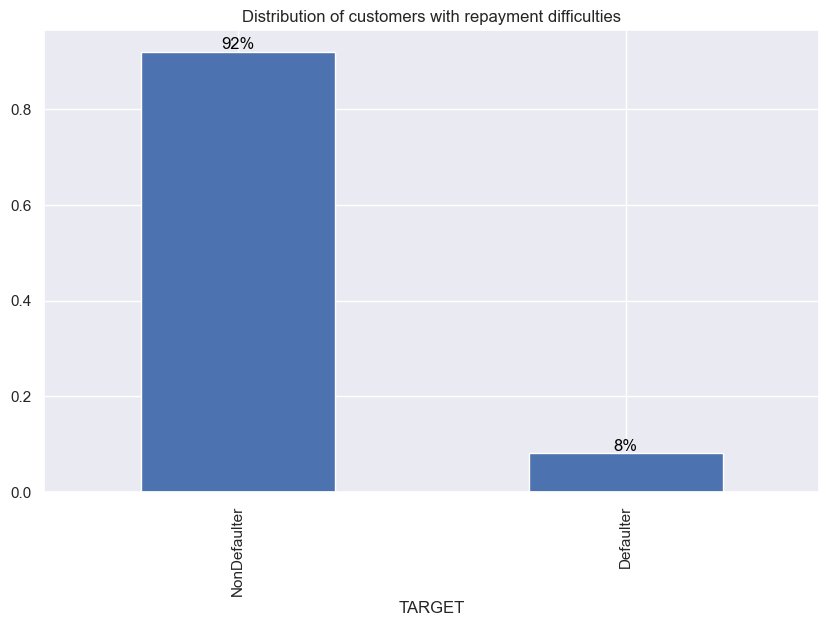

<IPython.core.display.Javascript object>

In [14]:
sns.set(rc={"figure.figsize": (10, 6)})
percentage = (df_train_mod["TARGET"].value_counts() / df_train_mod.shape[0]).rename(
    index={0: "NonDefaulter", 1: "Defaulter"}
)
ax = percentage.plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container, padding=0, color="black", fmt="{:.0%}")
ax.set_title("Distribution of customers with repayment difficulties")

#### 2.1.2 Checking missing values

Here, the missing values are checked from the applicant dataset.

Total number of null values in data: 9151173
Number of null values per column:
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 66, dtype: int64


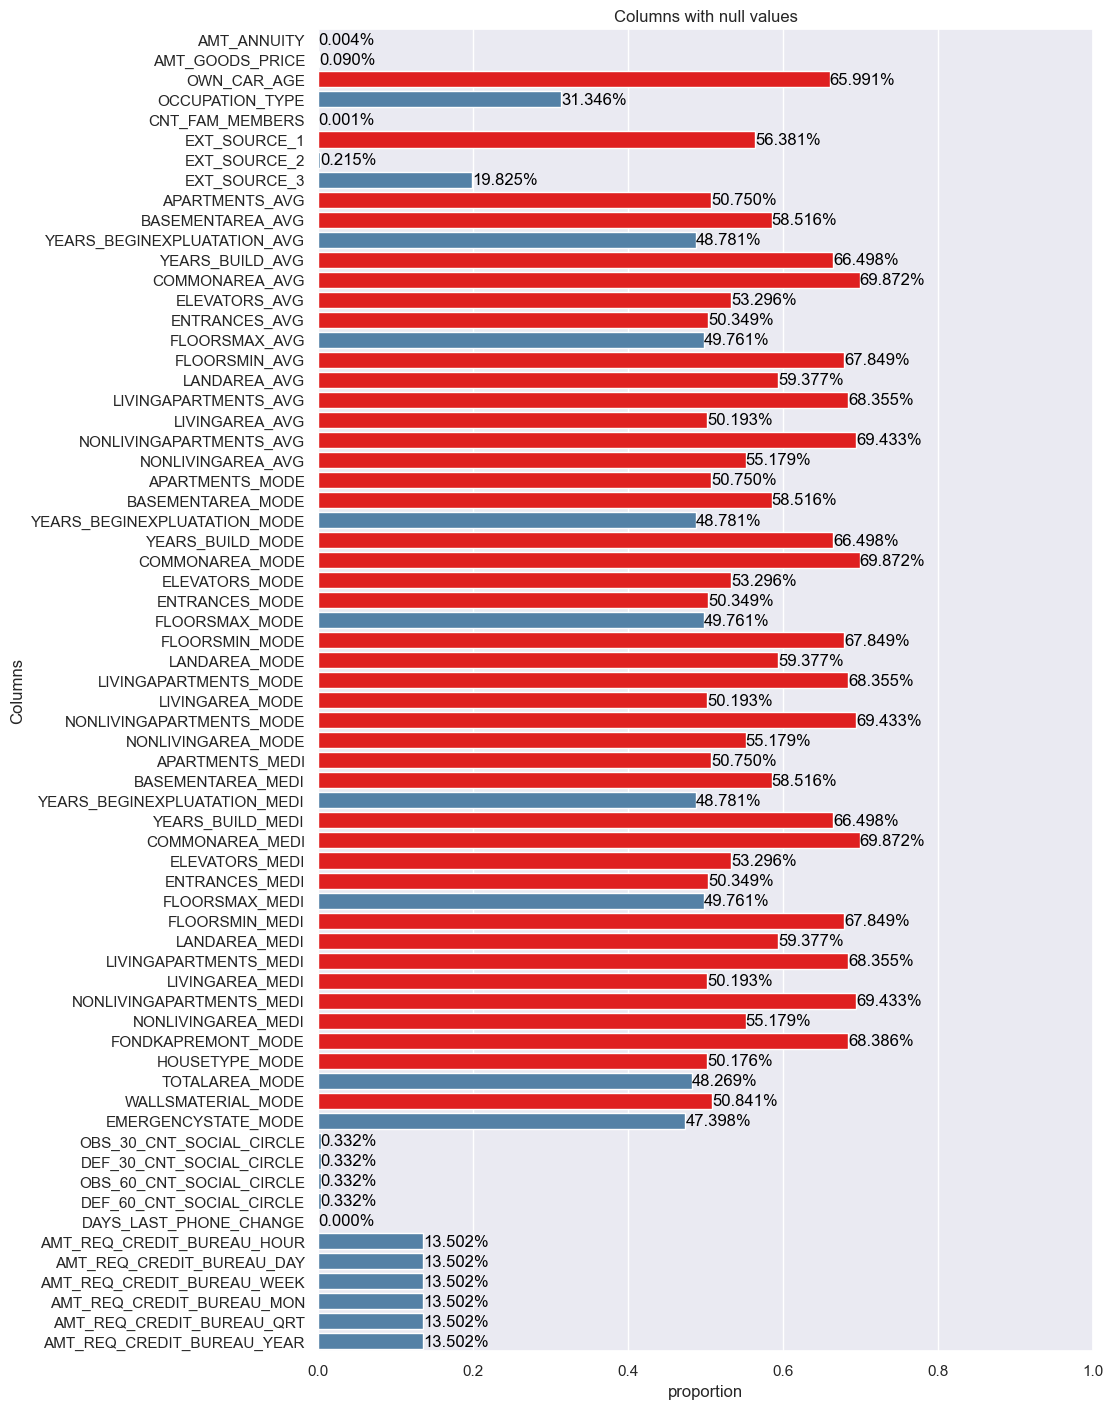

<IPython.core.display.Javascript object>

In [15]:
preprocessingtools.check_null_values(df_train_mod)

The rule of thumb is that the percentage of missing values in a column should not exceed 50%, beyond which these columns should be dropped. Here missing data is mainly house or apartment data of the applicant. In addition, car age and external document information is missing.

In [16]:
app_encoder = applicationpreprocess.AppDataEncoder()

<IPython.core.display.Javascript object>

In [17]:
df_train_mod = app_encoder.flags_for_missing_vals(df_train_mod)
df_train_mod.loc[df_train_mod.HOUSING_INFO_MISSING_RATIO > 0.95, "TARGET"].value_counts(
    normalize=True
)

flags_for_missing_vals time spent 0:00:00.120355 seconds, shape = (307511, 105)


TARGET
0    0.907802
1    0.092198
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

The ratio of default is slighly higher for applicants that have missing housing information so a ratio of missing housing information feature is created.

In [18]:
df_train_mod.loc[df_train_mod.EXT_SOURCE_1.isna(), "TARGET"].value_counts(
    normalize=True
)

TARGET
0    0.914805
1    0.085195
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

For the missing external 1 document the difference in target feature distribution is not that significant.

In [19]:
df_train_mod.loc[df_train_mod.OWN_CAR_AGE.isna(), "FLAG_OWN_CAR"].value_counts()

FLAG_OWN_CAR
N    202924
Y         5
Name: count, dtype: int64

<IPython.core.display.Javascript object>

Missing values in OWN_CAR_AGE are mainly for those that do not have car. As there is already a flag indicating if the person has car these missing values can be imputed.

In [20]:
df_train_mod.loc[
    df_train_mod.FLAG_CREDIT_BUREAU_MISSING == 1, "FLAG_CREDIT_BUREAU_MISSING"
].value_counts()

FLAG_CREDIT_BUREAU_MISSING
1    41519
Name: count, dtype: int64

<IPython.core.display.Javascript object>

It seems that these values from AMT_REQ_CREDIT.. are either all missing or none are missing.

In [21]:
df_train_mod.loc[df_train_mod.FLAG_CREDIT_BUREAU_MISSING > 0, "TARGET"].value_counts(
    normalize=True
)

TARGET
0    0.896626
1    0.103374
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

The flag column is created as the distribution of target feature changes within the rows where the AMT_REQ_CREDIT.. values are missing.

#### 2.1.3 Outliers and anomalies checking

The numerical features are defined for this part.

In [22]:
numerical_features = [
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "REGION_POPULATION_RELATIVE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "DAYS_ID_PUBLISH",
    "OWN_CAR_AGE",
    "CNT_FAM_MEMBERS",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "APARTMENTS_AVG",
    "BASEMENTAREA_AVG",
    "YEARS_BEGINEXPLUATATION_AVG",
    "YEARS_BUILD_AVG",
    "COMMONAREA_AVG",
    "ELEVATORS_AVG",
    "ENTRANCES_AVG",
    "FLOORSMAX_AVG",
    "FLOORSMIN_AVG",
    "LANDAREA_AVG",
    "LIVINGAPARTMENTS_AVG",
    "LIVINGAREA_AVG",
    "NONLIVINGAPARTMENTS_AVG",
    "NONLIVINGAREA_AVG",
    "APARTMENTS_MODE",
    "BASEMENTAREA_MODE",
    "YEARS_BEGINEXPLUATATION_MODE",
    "YEARS_BUILD_MODE",
    "COMMONAREA_MODE",
    "ELEVATORS_MODE",
    "ENTRANCES_MODE",
    "FLOORSMAX_MODE",
    "FLOORSMIN_MODE",
    "LANDAREA_MODE",
    "LIVINGAPARTMENTS_MODE",
    "LIVINGAREA_MODE",
    "NONLIVINGAPARTMENTS_MODE",
    "NONLIVINGAREA_MODE",
    "APARTMENTS_MEDI",
    "BASEMENTAREA_MEDI",
    "YEARS_BEGINEXPLUATATION_MEDI",
    "YEARS_BUILD_MEDI",
    "COMMONAREA_MEDI",
    "ELEVATORS_MEDI",
    "ENTRANCES_MEDI",
    "FLOORSMAX_MEDI",
    "FLOORSMIN_MEDI",
    "LANDAREA_MEDI",
    "LIVINGAPARTMENTS_MEDI",
    "LIVINGAREA_MEDI",
    "NONLIVINGAPARTMENTS_MEDI",
    "NONLIVINGAREA_MEDI",
    "TOTALAREA_MODE",
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
    "DAYS_LAST_PHONE_CHANGE",
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR",
    "HOUSING_INFO_MISSING_RATIO",
]

<IPython.core.display.Javascript object>

In [23]:
pd.set_option("display.max_columns", 100)

<IPython.core.display.Javascript object>

In [24]:
outliers = preprocessingtools.find_outliers_IRQ(
    df_train_mod[numerical_features])
outliers.sort(key=lambda x: x[1], reverse=True)
for tpl in outliers:
    print(f"From {tpl[0]} {tpl[1]:.2%} are outliers based on 1.5 x IQR range.")

From DAYS_EMPLOYED 23.48% are outliers based on 1.5 x IQR range.
From AMT_REQ_CREDIT_BUREAU_QRT 16.45% are outliers based on 1.5 x IQR range.
From AMT_REQ_CREDIT_BUREAU_MON 14.23% are outliers based on 1.5 x IQR range.
From DEF_30_CNT_SOCIAL_CIRCLE 11.44% are outliers based on 1.5 x IQR range.
From DEF_60_CNT_SOCIAL_CIRCLE 8.38% are outliers based on 1.5 x IQR range.
From OBS_30_CNT_SOCIAL_CIRCLE 6.49% are outliers based on 1.5 x IQR range.
From OBS_60_CNT_SOCIAL_CIRCLE 6.36% are outliers based on 1.5 x IQR range.
From NONLIVINGAREA_MODE 6.12% are outliers based on 1.5 x IQR range.
From NONLIVINGAREA_MEDI 5.61% are outliers based on 1.5 x IQR range.
From NONLIVINGAREA_AVG 5.38% are outliers based on 1.5 x IQR range.
From NONLIVINGAPARTMENTS_AVG 5.07% are outliers based on 1.5 x IQR range.
From NONLIVINGAPARTMENTS_MEDI 4.95% are outliers based on 1.5 x IQR range.
From AMT_GOODS_PRICE 4.79% are outliers based on 1.5 x IQR range.
From NONLIVINGAPARTMENTS_MODE 4.63% are outliers based on 1

<IPython.core.display.Javascript object>

It seens that some of numerical features have outliers quite a large number. 

The days employed has the highest number of outliers. Some of the days employed have positive 'infinite' value. These rows are for unemployed or pensioners. For modelling purposes a flag feature is created that indicates the difference, but the 'infinite' day value will be change to null and is considered as other missing values.

In [25]:
df_train_mod[df_train_mod.DAYS_EMPLOYED == 365243].NAME_INCOME_TYPE.unique()

array(['Pensioner', 'Unemployed'], dtype=object)

<IPython.core.display.Javascript object>

In [26]:
df_train_mod[df_train_mod.DAYS_EMPLOYED > 0].DAYS_EMPLOYED.unique()

array([365243], dtype=int64)

<IPython.core.display.Javascript object>

In [27]:
df_train_mod = app_encoder.replace_value(
    df_train_mod, ["DAYS_EMPLOYED"], [365243], np.nan
)

replace_value time spent 0:00:00.002992 seconds, shape = (307511, 105)


<IPython.core.display.Javascript object>

For pensioners and unemployed applicants the days employd feature is set to 'infinity' and clearly separated from the employed applicants. 

In [28]:
print(
    f"Number of data instances with income level above 20000000: {(df_train_mod.AMT_INCOME_TOTAL > 20000000).sum()}"
)
df_train_mod = preprocessingtools.drop_rows_outside_range(
    df_train_mod, "AMT_INCOME_TOTAL", 20000000, 0
)

Number of data instances with income level above 20000000: 1
Number of data instances removed: 1


<IPython.core.display.Javascript object>

There is only one data instance above 20000000 annual income level. This is considered an error as it is so much further away from the other values and it is removed from the dataset.

In [29]:
print(
    f"Number of data instances with social observations level above 300: {(df_train_mod.OBS_60_CNT_SOCIAL_CIRCLE > 300).sum()}"
)
df_train_mod = preprocessingtools.drop_rows_outside_range(
    df_train_mod, "OBS_60_CNT_SOCIAL_CIRCLE", 300, 0
)

Number of data instances with social observations level above 300: 1
Number of data instances removed: 1


<IPython.core.display.Javascript object>

Similarly, there is only one data instance that has more than 300 observations in OBS_30 or OBS 60_CNT_SOCIAL_CIRCLE feature. This is considered an error as it is so much further away from the other values and it is removed from the dataset.

In [30]:
categorical_features = [
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "OCCUPATION_TYPE",
    "REGION_RATING_CLIENT",
    "REGION_RATING_CLIENT_W_CITY",
    "REG_REGION_NOT_LIVE_REGION",
    "REG_REGION_NOT_WORK_REGION",
    "LIVE_REGION_NOT_WORK_REGION",
    "REG_CITY_NOT_LIVE_CITY",
    "REG_CITY_NOT_WORK_CITY",
    "LIVE_CITY_NOT_WORK_CITY",
    "ORGANIZATION_TYPE",
    "FONDKAPREMONT_MODE",
    "HOUSETYPE_MODE",
    "WALLSMATERIAL_MODE",
    "EMERGENCYSTATE_MODE",
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9",
    "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_18",
    "FLAG_CREDIT_BUREAU_MISSING",
]

<IPython.core.display.Javascript object>

Next, the categorical features and their classes are investigated. Too small classes or anomalies are removed.

In [31]:
print("Total number of classes per feature:")
df_train_mod[categorical_features].apply(pd.Series.nunique, axis=0)

Total number of classes per feature:


NAME_CONTRACT_TYPE              2
CODE_GENDER                     3
FLAG_OWN_CAR                    2
FLAG_OWN_REALTY                 2
NAME_INCOME_TYPE                8
NAME_EDUCATION_TYPE             5
NAME_FAMILY_STATUS              6
NAME_HOUSING_TYPE               6
OCCUPATION_TYPE                18
REGION_RATING_CLIENT            3
REGION_RATING_CLIENT_W_CITY     3
REG_REGION_NOT_LIVE_REGION      2
REG_REGION_NOT_WORK_REGION      2
LIVE_REGION_NOT_WORK_REGION     2
REG_CITY_NOT_LIVE_CITY          2
REG_CITY_NOT_WORK_CITY          2
LIVE_CITY_NOT_WORK_CITY         2
ORGANIZATION_TYPE              58
FONDKAPREMONT_MODE              4
HOUSETYPE_MODE                  3
WALLSMATERIAL_MODE              7
EMERGENCYSTATE_MODE             2
FLAG_DOCUMENT_3                 2
FLAG_DOCUMENT_5                 2
FLAG_DOCUMENT_6                 2
FLAG_DOCUMENT_8                 2
FLAG_DOCUMENT_9                 2
FLAG_DOCUMENT_11                2
FLAG_DOCUMENT_13                2
FLAG_DOCUMENT_

<IPython.core.display.Javascript object>

First, some missing values in categories are dealt.

In [32]:
print(df_train_mod.CODE_GENDER.value_counts())
df_train_mod = preprocessingtools.drop_rows_without_values(
    df_train_mod, "CODE_GENDER", ["F", "M"]
)

CODE_GENDER
F      202447
M      105058
XNA         4
Name: count, dtype: int64


<IPython.core.display.Javascript object>

The nan values are removed from gender feature.

In [33]:
print(df_train_mod.NAME_FAMILY_STATUS.value_counts())
df_train_mod = preprocessingtools.drop_rows_without_values(
    df_train_mod,
    "NAME_FAMILY_STATUS",
    ["Married", "Single / not married", "Civil marriage", "Separated", "Widow"],
)

NAME_FAMILY_STATUS
Married                 196428
Single / not married     45443
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64


<IPython.core.display.Javascript object>

Similarly, the unknown values from family status are removed.

In [34]:
app_encoder.fit(df_train_mod)
print(app_encoder.xna_columns)
df_train_mod = app_encoder.replace_value(
    df_train_mod, app_encoder.xna_columns, ["XNA"], np.nan
)

['ORGANIZATION_TYPE']
replace_value time spent 0:00:00.014205 seconds, shape = (307503, 105)


<IPython.core.display.Javascript object>

For organization type feature, the XNA (not available) data instances are converted to nan values that are dealt with imputers.

Next, the smallest classes of categories are combined in features that have multiple classes.

In [35]:
df_train_mod = app_encoder.replace_value(
    df_train_mod, ["NAME_EDUCATION_TYPE"], [
        "Academic degree"], "Higher education"
)

replace_value time spent 0:00:00.014616 seconds, shape = (307503, 105)


<IPython.core.display.Javascript object>

In [36]:
df_train_mod = app_encoder.combining_org_type(df_train_mod)

replace_value time spent 0:00:00.056206 seconds, shape = (307503, 105)
replace_value time spent 0:00:00.163452 seconds, shape = (307503, 105)
replace_value time spent 0:00:00.088588 seconds, shape = (307503, 105)
replace_value time spent 0:00:00.045798 seconds, shape = (307503, 105)
replace_value time spent 0:00:00.153973 seconds, shape = (307503, 105)
replace_value time spent 0:00:00.044018 seconds, shape = (307503, 105)
replace_value time spent 0:00:00.021998 seconds, shape = (307503, 105)
replace_value time spent 0:00:00.097947 seconds, shape = (307503, 105)
combining_org_type time spent 0:00:00.945608 seconds, shape = (307503, 105)


<IPython.core.display.Javascript object>

In [37]:
df_train_mod.ORGANIZATION_TYPE.value_counts(normalize=True)

ORGANIZATION_TYPE
Business Entity    0.336951
Public             0.198200
Self-employed      0.152351
Other              0.066169
Trade              0.056776
Industry           0.056757
Services           0.043664
Transport          0.035656
Construction       0.026657
Finance            0.013517
House              0.013303
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

In [38]:
df_train_mod = app_encoder.combining_occ_type(df_train_mod)

replace_value time spent 0:00:00.038562 seconds, shape = (307503, 105)
replace_value time spent 0:00:00.034000 seconds, shape = (307503, 105)
replace_value time spent 0:00:00.023001 seconds, shape = (307503, 105)
combining_occ_type time spent 0:00:00.096559 seconds, shape = (307503, 105)


<IPython.core.display.Javascript object>

In [39]:
df_train_mod.OCCUPATION_TYPE.value_counts(normalize=True).sort_values()

OCCUPATION_TYPE
administration staff     0.011340
Private service staff    0.012562
Cooking staff            0.028165
Security staff           0.031836
low-skill Laborers       0.038335
Medicine staff           0.040438
Accountants              0.046477
High skill tech staff    0.053905
Drivers                  0.088118
Managers                 0.101225
Core staff               0.130583
sales staff              0.155617
Laborers                 0.261399
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

In [40]:
df_train_mod = app_encoder.combining_inc_type(df_train_mod)

replace_value time spent 0:00:00.065015 seconds, shape = (307503, 105)
replace_value time spent 0:00:00.027537 seconds, shape = (307503, 105)
combining_inc_type time spent 0:00:00.092552 seconds, shape = (307503, 105)


<IPython.core.display.Javascript object>

In [41]:
df_train_mod.NAME_INCOME_TYPE.value_counts(normalize=True).sort_values()

NAME_INCOME_TYPE
State servant           0.070575
beneficiary             0.180184
commercial associate    0.232921
Working                 0.516320
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

#### 2.1.4 Descriptive statistics

In [42]:
round(df_train_mod[numerical_features].agg(["mean", "median", "std", "min", "max"]))

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HOUSING_INFO_MISSING_RATIO
mean,0.0,168417.0,599030.0,27109.0,538399.0,0.0,-16037.0,-2384.0,-2994.0,12.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-963.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
median,0.0,146997.0,513531.0,24903.0,450000.0,0.0,-15750.0,-1648.0,-3254.0,9.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-757.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
std,1.0,108812.0,402494.0,14494.0,369448.0,0.0,4364.0,2338.0,1509.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,827.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0
min,0.0,25650.0,45000.0,1616.0,40500.0,0.0,-25229.0,-17912.0,-7197.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,19.0,18000090.0,4050000.0,258026.0,4050000.0,0.0,-7489.0,0.0,0.0,91.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0,8.0,47.0,7.0,0.0,4.0,9.0,8.0,27.0,261.0,25.0,1.0


<IPython.core.display.Javascript object>

#### 2.1.5 Encoding categorical features
Here the categorical features are encoded with ordinal or one-hot -encoding methods.

In [43]:
ord_columns = {
    "CODE_GENDER": ["m", "f"],
    "FLAG_OWN_CAR": [],
    "FLAG_OWN_REALTY": [],
    "REGION_RATING_CLIENT": [1, 2, 3],
    "REGION_RATING_CLIENT_W_CITY": [1, 2, 3],
    "REG_REGION_NOT_LIVE_REGION": [],
    "REG_REGION_NOT_WORK_REGION": [],
    "LIVE_REGION_NOT_WORK_REGION": [],
    "REG_CITY_NOT_LIVE_CITY": [],
    "REG_CITY_NOT_WORK_CITY": [],
    "LIVE_CITY_NOT_WORK_CITY": [],
    "EMERGENCYSTATE_MODE": ["no", "yes"],
    "FLAG_DOCUMENT_3": [],
    "FLAG_DOCUMENT_5": [],
    "FLAG_DOCUMENT_6": [],
    "FLAG_DOCUMENT_8": [],
    "FLAG_DOCUMENT_9": [],
    "FLAG_DOCUMENT_11": [],
    "FLAG_DOCUMENT_13": [],
    "FLAG_DOCUMENT_14": [],
    "FLAG_DOCUMENT_15": [],
    "FLAG_DOCUMENT_16": [],
    "FLAG_DOCUMENT_18": [],
    "FLAG_CREDIT_BUREAU_MISSING": [],
}

oh_columns = [
    "NAME_CONTRACT_TYPE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "OCCUPATION_TYPE",
    "ORGANIZATION_TYPE",
    "FONDKAPREMONT_MODE",
    "HOUSETYPE_MODE",
    "WALLSMATERIAL_MODE",
]

<IPython.core.display.Javascript object>

In [44]:
app_encoder.oh_columns = oh_columns
app_encoder.ord_columns = ord_columns

<IPython.core.display.Javascript object>

In [45]:
df_train_enc = app_encoder.encode(df_train_mod.copy())

encode time spent 0:00:02.751138 seconds, shape = (307503, 154)


<IPython.core.display.Javascript object>

In [46]:
df_train_enc.head()

,SK_ID_CURR,TARGET,CODE_GENDER_f,FLAG_OWN_CAR_y,FLAG_OWN_REALTY_y,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION_1,REG_REGION_NOT_WORK_REGION_1,LIVE_REGION_NOT_WORK_REGION_1,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,...,NAME_EDUCATION_TYPE_Secondary___secondary_special,NAME_FAMILY_STATUS_Civil_marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single___not_married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co_op_apartment,NAME_HOUSING_TYPE_House___apartment,NAME_HOUSING_TYPE_Municipal_apartment,NAME_HOUSING_TYPE_Office_apartment,NAME_HOUSING_TYPE_Rented_apartment,NAME_HOUSING_TYPE_With_parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cooking_staff,OCCUPATION_TYPE_Core_staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High_skill_tech_staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine_staff,OCCUPATION_TYPE_Private_service_staff,OCCUPATION_TYPE_Security_staff,OCCUPATION_TYPE_administration_staff,OCCUPATION_TYPE_low_skill_Laborers,OCCUPATION_TYPE_sales_staff,ORGANIZATION_TYPE_Business_Entity,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Finance,ORGANIZATION_TYPE_House,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public,ORGANIZATION_TYPE_Self_employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,FONDKAPREMONT_MODE_not_specified,FONDKAPREMONT_MODE_org_spec_account,FONDKAPREMONT_MODE_reg_oper_account,FONDKAPREMONT_MODE_reg_oper_spec_account,HOUSETYPE_MODE_block_of_flats,HOUSETYPE_MODE_specific_housing,HOUSETYPE_MODE_terraced_house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stone__brick,WALLSMATERIAL_MODE_Wooden
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-2120,NaN,1.0,1,1,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,100003,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-291,NaN,2.0,0,0,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2,100004,0,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-2531,26.0,1.0,1,1,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,1,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-2437,NaN,2.0,1,1,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-3458,NaN,1.0,1,1,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN

<IPython.core.display.Javascript object>

### 2.2 Previous applications

Here the previous applications are investigated.

In [48]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

#### 2.2.1 Checking missing values

Here, the missing values are checked from the applicant dataset.

Total number of null values in data: 11109336
Number of null values per column:
AMT_ANNUITY                   372235
AMT_CREDIT                         1
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64


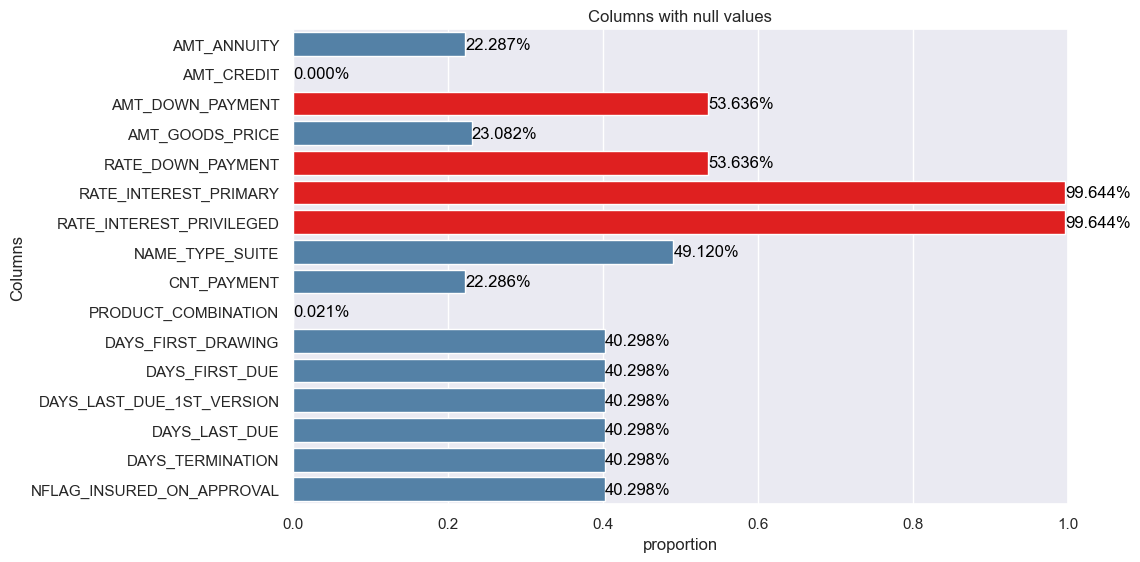

<IPython.core.display.Javascript object>

In [49]:
preprocessingtools.check_null_values(df_prev)

The interest rate features are missing majority of the values.

The unnecessary features and interest features which have mainly missing values are removed.

In [50]:
columns_to_drop = [
    "NAME_TYPE_SUITE",
    "WEEKDAY_APPR_PROCESS_START",
    "HOUR_APPR_PROCESS_START",
    "RATE_INTEREST_PRIMARY",
    "RATE_INTEREST_PRIVILEGED",
]
df_prev_mod = (
    df_prev.pipe(commonpipeline.start_cleaning_pipeline)
    .pipe(commonpipeline.remove_columns, columns_to_drop=columns_to_drop)
    .pipe(commonpipeline.remove_duplicates)
    .pipe(commonpipeline.clean_column_names)
)

start_cleaning_pipeline spent 0:00:00.097687 seconds, shape = (1670214, 37)
remove_columns spent 0:00:00.200117 seconds, shape = (1670214, 32)
remove_duplicates spent 0:00:02.825201 seconds, shape = (1670214, 32)
clean_column_names spent 0:00:00 seconds, shape = (1670214, 32)


<IPython.core.display.Javascript object>

In [51]:
ord_columns = {
    "NAME_CONTRACT_STATUS": ["refused", "canceled", "unused offer", "approved"],
    "NAME_CLIENT_TYPE": ["new", "refreshed", "repeater"],
    "NAME_PRODUCT_TYPE": ["walk-in", "x-sell"],
    "NAME_YIELD_GROUP": ["low_normal", "low_action", "middle", "high"],
    "FLAG_LAST_APPL_PER_CONTRACT": ["n", "y"],
    "NFLAG_LAST_APPL_IN_DAY": [],
    "NFLAG_INSURED_ON_APPROVAL": [],
    "FLAG_MISSING_FIRST_DRAW": [],
}

oh_columns = [
    "NAME_CONTRACT_TYPE",
    "NAME_CASH_LOAN_PURPOSE",
    "NAME_PAYMENT_TYPE",
    "CODE_REJECT_REASON",
    "NAME_GOODS_CATEGORY",
    "NAME_PORTFOLIO",
    "CHANNEL_TYPE",
    "NAME_SELLER_INDUSTRY",
    "PRODUCT_COMBINATION",
]

prev_encoder = previouspreprocess.PreAppDataEncoder(
    oh_columns=oh_columns, ord_columns=ord_columns
)

<IPython.core.display.Javascript object>

In [52]:
df_prev_mod.NAME_CONTRACT_STATUS.value_counts(normalize=True)

NAME_CONTRACT_STATUS
Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

In [53]:
df_prev_mod.loc[df_prev_mod.AMT_ANNUITY.isna(), "NAME_CONTRACT_STATUS"].value_counts(
    normalize=True
)

NAME_CONTRACT_STATUS
Canceled        0.821537
Refused         0.109871
Unused offer    0.068570
Approved        0.000021
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

In [54]:
df_prev_mod.loc[df_prev_mod.CNT_PAYMENT.isna(), "NAME_CONTRACT_STATUS"].value_counts(
    normalize=True
)

NAME_CONTRACT_STATUS
Canceled        0.821549
Refused         0.109870
Unused offer    0.068571
Approved        0.000011
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

The annuity and payment count is missing for those applicants that were rejected. Let's crete a common flag for missing values in these two features. In addition, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, and  NFLAG_INSURED_ON_APPROVAL are missing the values on the same row so only one flag feature is created for these features.

In [55]:
df_prev_mod = prev_encoder.flags_for_missing_vals(df_prev_mod)

flags_for_missing_vals time spent 0:00:00.027003 seconds, shape = (1670214, 34)


<IPython.core.display.Javascript object>

In [56]:
df_prev_mod.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,FLAG_MISSING_FIRST_DRAW,FLAG_MISSING_ANNUITY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,Y,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0,0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,Y,1,NaN,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0,0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,Y,1,NaN,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,0,0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,Y,1,NaN,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,0,0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,Y,1,NaN,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,1,0


<IPython.core.display.Javascript object>

#### 2.2.2 Outliers and anomalies checking

In [57]:
numerical_features = [
    "AMT_ANNUITY",
    "AMT_APPLICATION",
    "AMT_CREDIT",
    "AMT_DOWN_PAYMENT",
    "AMT_GOODS_PRICE",
    "RATE_DOWN_PAYMENT",
    "DAYS_DECISION",
    "SELLERPLACE_AREA",
    "CNT_PAYMENT",
    "DAYS_FIRST_DRAWING",
    "DAYS_FIRST_DUE",
    "DAYS_LAST_DUE_1ST_VERSION",
    "DAYS_LAST_DUE",
    "DAYS_TERMINATION",
]

<IPython.core.display.Javascript object>

In [58]:
pd.set_option("display.max_columns", 100)
outliers = preprocessingtools.find_outliers_IRQ(
    df_prev_mod[numerical_features])
outliers.sort(key=lambda x: x[1], reverse=True)
for tpl in outliers:
    print(f"From {tpl[0]} {tpl[1]:.2%} are outliers based on 1.5 x IQR range.")

From SELLERPLACE_AREA 16.05% are outliers based on 1.5 x IQR range.
From DAYS_TERMINATION 13.53% are outliers based on 1.5 x IQR range.
From DAYS_LAST_DUE 12.65% are outliers based on 1.5 x IQR range.
From AMT_APPLICATION 12.45% are outliers based on 1.5 x IQR range.
From AMT_CREDIT 10.78% are outliers based on 1.5 x IQR range.
From AMT_GOODS_PRICE 8.72% are outliers based on 1.5 x IQR range.
From DAYS_LAST_DUE_1ST_VERSION 5.62% are outliers based on 1.5 x IQR range.
From AMT_ANNUITY 4.96% are outliers based on 1.5 x IQR range.
From AMT_DOWN_PAYMENT 3.86% are outliers based on 1.5 x IQR range.
From DAYS_FIRST_DRAWING 3.75% are outliers based on 1.5 x IQR range.
From CNT_PAYMENT 3.35% are outliers based on 1.5 x IQR range.
From RATE_DOWN_PAYMENT 2.58% are outliers based on 1.5 x IQR range.
From DAYS_FIRST_DUE 2.43% are outliers based on 1.5 x IQR range.
From DAYS_DECISION 1.05% are outliers based on 1.5 x IQR range.


<IPython.core.display.Javascript object>

Next, the most extreme outliers and anomalies are handled or removed if considered necessary.

In [59]:
print(
    f"Number of data instances with seller place area above 400000: {(df_prev_mod.SELLERPLACE_AREA > 400000).sum()}"
)

Number of data instances with seller place area above 400000: 5


<IPython.core.display.Javascript object>

In [64]:
print(
    f"Number of data instances with seller place area above 400000: {(df_prev_mod.SELLERPLACE_AREA > 400000).sum()}"
)
df_prev_mod = preprocessingtools.drop_rows_outside_range(
    df_prev_mod, "SELLERPLACE_AREA", 400000, -1
)

Number of data instances with seller place area above 400000: 5
Number of data instances removed: 5


<IPython.core.display.Javascript object>

In [65]:
df_prev_mod = prev_encoder.replace_value(
    df_prev_mod, ["SELLERPLACE_AREA"], [-1], np.nan
)

replace_value time spent 0:00:00.009563 seconds, shape = (1670209, 34)


<IPython.core.display.Javascript object>

There are a great amount of data instances with -1 as SELLERPLACE AREA. This are converted to null values.

In [66]:
date_columns = [
    "DAYS_FIRST_DRAWING",
    "DAYS_FIRST_DUE",
    "DAYS_LAST_DUE_1ST_VERSION",
    "DAYS_LAST_DUE",
    "DAYS_TERMINATION",
]
df_prev_mod = prev_encoder.replace_value(
    df_prev_mod, date_columns, [365243], np.nan)

replace_value time spent 0:00:00.030355 seconds, shape = (1670209, 34)


<IPython.core.display.Javascript object>

The date values are handled as there might be similar 'inifite' values as in the previous table.

Then the categorical features are handled.

In [74]:
categorical_features = [
    "NAME_CONTRACT_TYPE",
    "FLAG_LAST_APPL_PER_CONTRACT",
    "NFLAG_LAST_APPL_IN_DAY",
    "NAME_CASH_LOAN_PURPOSE",
    "NAME_CONTRACT_STATUS",
    "NAME_PAYMENT_TYPE",
    "CODE_REJECT_REASON",
    "NAME_CLIENT_TYPE",
    "NAME_GOODS_CATEGORY",
    "NAME_PORTFOLIO",
    "NAME_PRODUCT_TYPE",
    "CHANNEL_TYPE",
    "NAME_SELLER_INDUSTRY",
    "NAME_YIELD_GROUP",
    "PRODUCT_COMBINATION",
    "NFLAG_INSURED_ON_APPROVAL",
    "FLAG_MISSING_FIRST_DRAW",
]

<IPython.core.display.Javascript object>

In [75]:
print("Total number of classes per feature:")
df_prev_mod[categorical_features].apply(pd.Series.nunique, axis=0)

Total number of classes per feature:


NAME_CONTRACT_TYPE              3
FLAG_LAST_APPL_PER_CONTRACT     2
NFLAG_LAST_APPL_IN_DAY          2
NAME_CASH_LOAN_PURPOSE         13
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               3
CODE_REJECT_REASON              8
NAME_CLIENT_TYPE                3
NAME_GOODS_CATEGORY            27
NAME_PORTFOLIO                  4
NAME_PRODUCT_TYPE               2
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           10
NAME_YIELD_GROUP                4
PRODUCT_COMBINATION            17
NFLAG_INSURED_ON_APPROVAL       2
FLAG_MISSING_FIRST_DRAW         2
dtype: int64

<IPython.core.display.Javascript object>

In [76]:
prev_encoder = prev_encoder.fit(df_prev_mod)
prev_encoder.xna_columns

['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']

<IPython.core.display.Javascript object>

In [77]:
df_prev_mod = prev_encoder.replace_value(
    df_prev_mod, prev_encoder.xna_columns, ["XNA"], np.nan
)

replace_value time spent 0:00:00.558049 seconds, shape = (1670209, 34)


<IPython.core.display.Javascript object>

The XNA values are replaced with NaN and imputed later on.

In [78]:
df_prev_mod = prev_encoder.combining_rare_categories(
    df_prev_mod, "NAME_CASH_LOAN_PURPOSE"
)
df_prev_mod["NAME_CASH_LOAN_PURPOSE"].value_counts(normalize=True)

combining_rare_categories time spent 0:00:00.192801 seconds, shape = (1670209, 34)


NAME_CASH_LOAN_PURPOSE
XAP                                 0.929824
Repairs                             0.023950
Other                               0.020630
Urgent needs                        0.008477
Buying a used car                   0.002910
Building a house or an annex        0.002714
Everyday expenses                   0.002435
Medicine                            0.002191
Payments on other loans             0.001946
Education                           0.001585
Journey                             0.001249
Purchase of electronic equipment    0.001069
Buying a new car                    0.001020
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

In [80]:
df_prev_mod = prev_encoder.combining_rare_categories(
    df_prev_mod, "NAME_GOODS_CATEGORY")
df_prev_mod["NAME_GOODS_CATEGORY"].value_counts(normalize=True)

combining_rare_categories time spent 0:00:00.192082 seconds, shape = (1670209, 34)


NAME_GOODS_CATEGORY
Mobile                      0.312355
Consumer Electronics        0.168996
Computers                   0.147024
Audio/Video                 0.138228
Furniture                   0.074584
Photo / Cinema Equipment    0.034780
Construction Materials      0.034744
Clothing and Accessories    0.032741
Auto Accessories            0.010260
Jewelry                     0.008743
Homewares                   0.006979
Medical Supplies            0.005342
Other                       0.004986
Vehicles                    0.004684
Sport and Leisure           0.004144
Gardening                   0.003704
Office Appliances           0.003243
Tourism                     0.002306
Medicine                    0.002155
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

All categories smaller than the threshold 0.1% are combined into Other category in loan purpose and goods categories. This improves the generalization of the model.

#### 2.2.3 Feature engineering
Here, new features are engineered and all the previous loan data aggregated.

New features include the interest rate of the loan, refused amt of loan and its ratios to the given credit, credit goods ratio, missing value ratio of the previous loans and so on.

The previous loan information are aggregated from last five years and weighted with exponential weights so that the most recent information has higher importance for the models.

In [81]:
df_prev_mod = prev_encoder.feature_engineering(df_prev_mod)
df_prev_mod.head()

feature_engineering time spent 0:00:00.773322 seconds, shape = (1670209, 43)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,FLAG_MISSING_FIRST_DRAW,FLAG_MISSING_ANNUITY,INTEREST_AMT,INTEREST_RATIO,INTEREST_RATE,AMT_REFUSED,AMT_REFUSED_RATIO,AMT_CREDIT_GOODS_RATIO,MISSING_VALUES_RATIO,CREDIT_DOWNPAYMENT_RATIO,REFUSED_APPLICATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,Y,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,NaN,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,0,0,3620.16,0.211150,0.389815,0.0,1.000000,1.00000,0.050,0.0,0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,Y,1,NaN,NaN,Approved,-164,NaN,XAP,Repeater,NaN,Cash,x-sell,Contact center,NaN,NaN,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,0,0,227119.14,0.334160,0.216753,-72171.0,0.893815,1.11880,0.250,NaN,0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,Y,1,NaN,NaN,Approved,-301,Cash through the bank,XAP,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,NaN,12.0,high,Cash X-Sell: high,NaN,-271.0,59.0,NaN,NaN,1.0,0,0,44284.32,0.324559,0.599186,-23944.5,0.824511,1.21284,0.225,NaN,0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,Y,1,NaN,NaN,Approved,-512,Cash through the bank,XAP,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,NaN,12.0,middle,Cash X-Sell: middle,NaN,-482.0,-152.0,-182.0,-177.0,1.0,0,0,93706.02,0.199040,0.367458,-20790.0,0.955840,1.04620,0.175,NaN,0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,Y,1,NaN,Repairs,Refused,-781,Cash through the bank,HC,Repeater,NaN,Cash,walk-in,Credit and cash offices,NaN,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,1,0,362130.48,0.896241,0.860391,-66555.0,0.835282,1.19720,0.275,NaN,1


<IPython.core.display.Javascript object>

In [82]:
df_prev_agg = prev_encoder.aggregations(df_prev_mod.copy(), weight=0.05)

aggregations time spent 0:00:13.948483 seconds, shape = (338855, 280)


<IPython.core.display.Javascript object>

In [83]:
df_comb = pd.merge(
    left=df_train_enc,
    right=df_prev_agg,
    left_on="SK_ID_CURR",
    right_index=True,
    how="left",
)

<IPython.core.display.Javascript object>

In [84]:
df_comb.head()

,SK_ID_CURR,TARGET,CODE_GENDER_f,FLAG_OWN_CAR_y,FLAG_OWN_REALTY_y,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION_1,REG_REGION_NOT_WORK_REGION_1,LIVE_REGION_NOT_WORK_REGION_1,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,...,PREV_FLAG_MISSING_FIRST_DRAW_1_MEAN,PREV_FLAG_MISSING_FIRST_DRAW_1_SUM,PREV_REFUSED_APPLICATION_1_MEAN,PREV_REFUSED_APPLICATION_1_SUM,APPROVED_AMT_ANNUITY_MEAN,APPROVED_AMT_ANNUITY_MAX,APPROVED_AMT_APPLICATION_MEAN,APPROVED_AMT_APPLICATION_MAX,APPROVED_AMT_CREDIT_MEAN,APPROVED_AMT_CREDIT_MAX,APPROVED_AMT_DOWN_PAYMENT_MEAN,APPROVED_AMT_DOWN_PAYMENT_MAX,APPROVED_AMT_GOODS_PRICE_MEAN,APPROVED_AMT_GOODS_PRICE_MAX,APPROVED_RATE_DOWN_PAYMENT_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,APPROVED_DAYS_DECISION_MEAN,APPROVED_DAYS_DECISION_MAX,APPROVED_SELLERPLACE_AREA_MEAN,APPROVED_SELLERPLACE_AREA_MAX,APPROVED_CNT_PAYMENT_MEAN,APPROVED_CNT_PAYMENT_MAX,APPROVED_DAYS_FIRST_DRAWING_MEAN,APPROVED_DAYS_FIRST_DRAWING_MAX,APPROVED_DAYS_FIRST_DUE_MEAN,APPROVED_DAYS_FIRST_DUE_MAX,APPROVED_DAYS_LAST_DUE_1ST_VERSION_MEAN,APPROVED_DAYS_LAST_DUE_1ST_VERSION_MAX,APPROVED_DAYS_LAST_DUE_MEAN,APPROVED_DAYS_LAST_DUE_MAX,APPROVED_DAYS_TERMINATION_MEAN,APPROVED_DAYS_TERMINATION_MAX,APPROVED_FLAG_MISSING_ANNUITY_MEAN,APPROVED_FLAG_MISSING_ANNUITY_MAX,APPROVED_INTEREST_AMT_MEAN,APPROVED_INTEREST_AMT_MAX,APPROVED_INTEREST_RATIO_MEAN,APPROVED_INTEREST_RATIO_MAX,APPROVED_INTEREST_RATE_MEAN,APPROVED_INTEREST_RATE_MAX,APPROVED_AMT_REFUSED_MEAN,APPROVED_AMT_REFUSED_MAX,APPROVED_AMT_REFUSED_RATIO_MEAN,APPROVED_AMT_REFUSED_RATIO_MAX,APPROVED_AMT_CREDIT_GOODS_RATIO_MEAN,APPROVED_AMT_CREDIT_GOODS_RATIO_MAX,APPROVED_MISSING_VALUES_RATIO_MEAN,APPROVED_MISSING_VALUES_RATIO_MAX,APPROVED_CREDIT_DOWNPAYMENT_RATIO_MEAN,APPROVED_CREDIT_DOWNPAYMENT_RATIO_MAX
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-2120,NaN,1.0,1,1,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,...,0.000000e+00,0.000000e+00,0.000000,0.000000,9251.775,9251.775,179055.000,179055.0,179055.00,179055.0,0.00,0.0,179055.000,179055.0,0.000000,0.000000,-606.000000,-606.0,500.00,500.0,24.000000,24.0,NaN,NaN,-565.000000,-565.0,125.000000,125.0,-25.000000,-25.0,-17.000000,-17.0,0.0,0.0,42987.600,42987.60,0.240080,0.240080,0.230477,0.230477,0.000,0.0,1.000000,1.000000,1.000000,1.000000,0.075,0.075,0.000000,0.000000
1,100003,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-291,NaN,2.0,0,0,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,...,0.000000e+00,0.000000e+00,0.000000,0.000000,56553.990,98356.995,435436.500,900000.0,484191.00,1035882.0,3442.50,6885.0,435436.500,900000.0,0.050030,0.100061,-1305.000000,-746.0,800.00,1400.0,10.000000,12.0,NaN,NaN,-1274.333333,-716.0,-1004.333333,-386.0,-1054.333333,-536.0,-1047.333333,-527.0,0.0,0.0,65321.550,144401.94,0.146201,0.188002,0.328564,0.381257,-48754.500,756.0,0.949329,1.011109,1.057664,1.150980,0.100,0.200,0.050585,0.101170
2,100004,0,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-2531,26.0,1.0,1,1,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,N

<IPython.core.display.Javascript object>

In [86]:
df_comb.shape

(307503, 434)

<IPython.core.display.Javascript object>

### 2.3 Installment data

Here the installment dataset is investigated. First, unnecessary columns are dropped.

In [87]:
df_inst.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


<IPython.core.display.Javascript object>

In [88]:
df_inst_mod = (
    df_inst.pipe(commonpipeline.start_cleaning_pipeline)
    .pipe(commonpipeline.remove_columns, columns_to_drop=["NUM_INSTALMENT_NUMBER"])
    .pipe(commonpipeline.remove_duplicates)
    .pipe(commonpipeline.clean_column_names)
)

start_cleaning_pipeline spent 0:00:00.917604 seconds, shape = (13605401, 8)
remove_columns spent 0:00:00.183232 seconds, shape = (13605401, 7)
remove_duplicates spent 0:00:08.404275 seconds, shape = (13603766, 7)
clean_column_names spent 0:00:00 seconds, shape = (13603766, 7)


<IPython.core.display.Javascript object>

#### 2.3.1 Checking missing values

Next, the missing values are checked from the installment datasets.

Total number of null values in data: 5810
Number of null values per column:
DAYS_ENTRY_PAYMENT    2905
AMT_PAYMENT           2905
dtype: int64


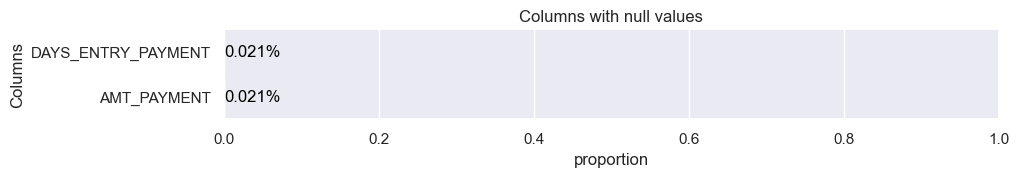

<IPython.core.display.Javascript object>

In [89]:
preprocessingtools.check_null_values(df_inst_mod)

#### 2.3.2 Outliers and anomalies checking

Then the outliers and anomalies are checked.

In [90]:
numerical_features = [
    "NUM_INSTALMENT_VERSION",
    "DAYS_INSTALMENT",
    "DAYS_ENTRY_PAYMENT",
    "AMT_INSTALMENT",
    "AMT_PAYMENT",
]

<IPython.core.display.Javascript object>

In [91]:
pd.set_option("display.max_columns", 100)
outliers = preprocessingtools.find_outliers_IRQ(
    df_inst_mod[numerical_features])
outliers.sort(key=lambda x: x[1], reverse=True)
for tpl in outliers:
    print(f"From {tpl[0]} {tpl[1]:.2%} are outliers based on 1.5 x IQR range.")

From AMT_PAYMENT 8.31% are outliers based on 1.5 x IQR range.
From AMT_INSTALMENT 8.24% are outliers based on 1.5 x IQR range.
From NUM_INSTALMENT_VERSION 3.07% are outliers based on 1.5 x IQR range.
From DAYS_ENTRY_PAYMENT 0.00% are outliers based on 1.5 x IQR range.
From DAYS_INSTALMENT 0.00% are outliers based on 1.5 x IQR range.


<IPython.core.display.Javascript object>

In [92]:
round(df_inst_mod[numerical_features].agg(
    ["mean", "median", "std", "min", "max"]))

,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
mean,1.0,-1042.0,-1051.0,17052.0,17240.0
median,1.0,-818.0,-827.0,8885.0,8127.0
std,1.0,801.0,801.0,50573.0,54739.0
min,0.0,-2922.0,-4921.0,0.0,0.0
max,178.0,-1.0,-1.0,3771488.0,3771488.0


<IPython.core.display.Javascript object>

Some of features have mediocre amount of outliers but no anomalies are identified and all data instances are kept.

#### 2.3.3 Feature engineering

Then new features are created, such as days past due, days before due and payment installment ratio. Finally, all the features are aggregated.

In [93]:
inst_enc = installmentpreprocess.InstDataEncoder()

<IPython.core.display.Javascript object>

In [94]:
df_inst_mod = inst_enc.feature_engineering(df_inst_mod)

feature_engineering time spent 0:00:05.360024 seconds, shape = (13603766, 11)


<IPython.core.display.Javascript object>

In [95]:
df_inst_agg = inst_enc.aggregations(df_inst_mod.copy())

aggregations time spent 0:00:21.233783 seconds, shape = (339587, 20)


<IPython.core.display.Javascript object>

In [96]:
df_comb = pd.merge(
    left=df_comb,
    right=df_inst_agg,
    left_on="SK_ID_CURR",
    right_index=True,
    how="left",
)

<IPython.core.display.Javascript object>

In [97]:
df_comb.head()

,SK_ID_CURR,TARGET,CODE_GENDER_f,FLAG_OWN_CAR_y,FLAG_OWN_REALTY_y,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION_1,REG_REGION_NOT_WORK_REGION_1,LIVE_REGION_NOT_WORK_REGION_1,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,...,APPROVED_CNT_PAYMENT_MEAN,APPROVED_CNT_PAYMENT_MAX,APPROVED_DAYS_FIRST_DRAWING_MEAN,APPROVED_DAYS_FIRST_DRAWING_MAX,APPROVED_DAYS_FIRST_DUE_MEAN,APPROVED_DAYS_FIRST_DUE_MAX,APPROVED_DAYS_LAST_DUE_1ST_VERSION_MEAN,APPROVED_DAYS_LAST_DUE_1ST_VERSION_MAX,APPROVED_DAYS_LAST_DUE_MEAN,APPROVED_DAYS_LAST_DUE_MAX,APPROVED_DAYS_TERMINATION_MEAN,APPROVED_DAYS_TERMINATION_MAX,APPROVED_FLAG_MISSING_ANNUITY_MEAN,APPROVED_FLAG_MISSING_ANNUITY_MAX,APPROVED_INTEREST_AMT_MEAN,APPROVED_INTEREST_AMT_MAX,APPROVED_INTEREST_RATIO_MEAN,APPROVED_INTEREST_RATIO_MAX,APPROVED_INTEREST_RATE_MEAN,APPROVED_INTEREST_RATE_MAX,APPROVED_AMT_REFUSED_MEAN,APPROVED_AMT_REFUSED_MAX,APPROVED_AMT_REFUSED_RATIO_MEAN,APPROVED_AMT_REFUSED_RATIO_MAX,APPROVED_AMT_CREDIT_GOODS_RATIO_MEAN,APPROVED_AMT_CREDIT_GOODS_RATIO_MAX,APPROVED_MISSING_VALUES_RATIO_MEAN,APPROVED_MISSING_VALUES_RATIO_MAX,APPROVED_CREDIT_DOWNPAYMENT_RATIO_MEAN,APPROVED_CREDIT_DOWNPAYMENT_RATIO_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DAYS_INSTALMENT_MAX,INSTAL_DAYS_INSTALMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_DAYS_PASS_DUE_MAX,INSTAL_DAYS_PASS_DUE_MEAN,INSTAL_DAYS_PASS_DUE_SUM,INSTAL_DAYS_BEFORE_DUE_MAX,INSTAL_DAYS_BEFORE_DUE_MEAN,INSTAL_DAYS_BEFORE_DUE_SUM,INSTAL_PAYMENT_INST_RATIO_MAX,INSTAL_PAYMENT_INST_RATIO_MEAN,INSTAL_INST_PAYMENT_DIFFERENCE_MAX,INSTAL_INST_PAYMENT_DIFFERENCE_MEAN,INSTAL_COUNT
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-2120,NaN,1.0,1,1,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,...,24.000000,24.0,NaN,NaN,-565.000000,-565.0,125.000000,125.0,-25.000000,-25.0,-17.000000,-17.0,0.0,0.0,42987.600,42987.60,0.240080,0.240080,0.230477,0.230477,0.000,0.0,1.000000,1.000000,1.000000,1.000000,0.075,0.075,0.000000,0.000000,19.0,-3.042491e-10,-6.525032e-01,-3.160960e-10,-1.069068e+00,1.521161e+04,8.406806e+02,1.521161e+04,8.406806e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.876115e+00,4.165650e-01,7.914735e+00,2.865048e-01,1.941020e-02,0.000000e+00,0.000000e+00,19.0
1,100003,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-291,NaN,2.0,0,0,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,...,10.000000,12.0,NaN,NaN,-1274.333333,-716.0,-1004.333333,-386.0,-1054.333333,-536.0,-1047.333333,-527.0,0.0,0.0,65321.550,144401.94,0.146201,0.188002,0.328564,0.381257,-48754.500,756.0,0.949329,1.011109,1.057664,1.150980,0.100,0.200,0.050585,0.101170,25.0,-1.594407e-47,-6.467274e-11,-1.604071e-47,-6.551832e-11,1.287488e-06,5.412285e-08,1.287488e-06,5.412285e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.836529e-11,8.455840e-13,2.113960e-11,2.295662e-12,1.186568e-13,0.000000e+00,0.000000e+00,25.0
2,100004,0,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.01003

<IPython.core.display.Javascript object>

In [98]:
df_comb.shape

(307503, 454)

<IPython.core.display.Javascript object>

### 2.4 Credit card balance

Next, the credit history dataset is investigated.

In [99]:
df_credit_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


<IPython.core.display.Javascript object>

In [100]:
df_credit_bal_mod = (
    df_credit_bal.pipe(commonpipeline.start_cleaning_pipeline)
    .pipe(commonpipeline.remove_columns, columns_to_drop=[])
    .pipe(commonpipeline.remove_duplicates)
    .pipe(commonpipeline.clean_column_names)
)

start_cleaning_pipeline spent 0:00:00.683213 seconds, shape = (3840312, 23)
remove_columns spent 0:00:00.243227 seconds, shape = (3840312, 23)
remove_duplicates spent 0:00:05.688804 seconds, shape = (3840312, 23)
clean_column_names spent 0:00:00 seconds, shape = (3840312, 23)


<IPython.core.display.Javascript object>

#### 2.4.1 Checking missing values

Here, the missing values are checked from the credit balance datasets.

Total number of null values in data: 5877356
Number of null values per column:
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
dtype: int64


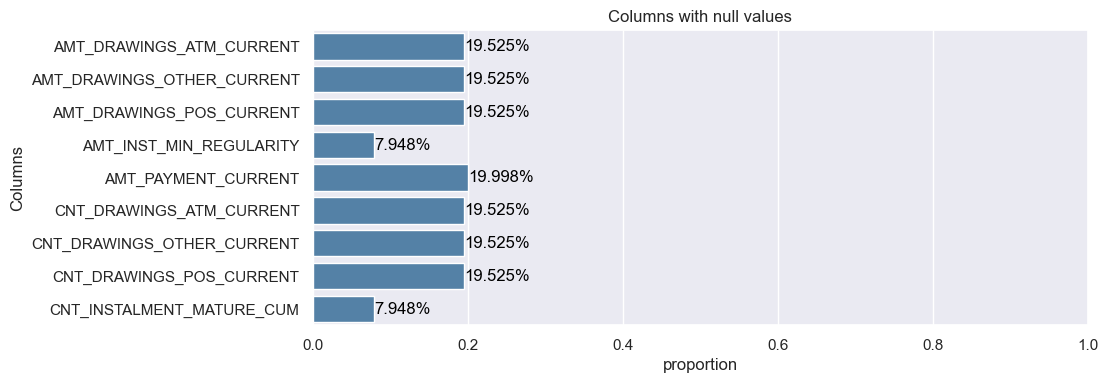

<IPython.core.display.Javascript object>

In [101]:
preprocessingtools.check_null_values(df_credit_bal_mod)

<Axes: >

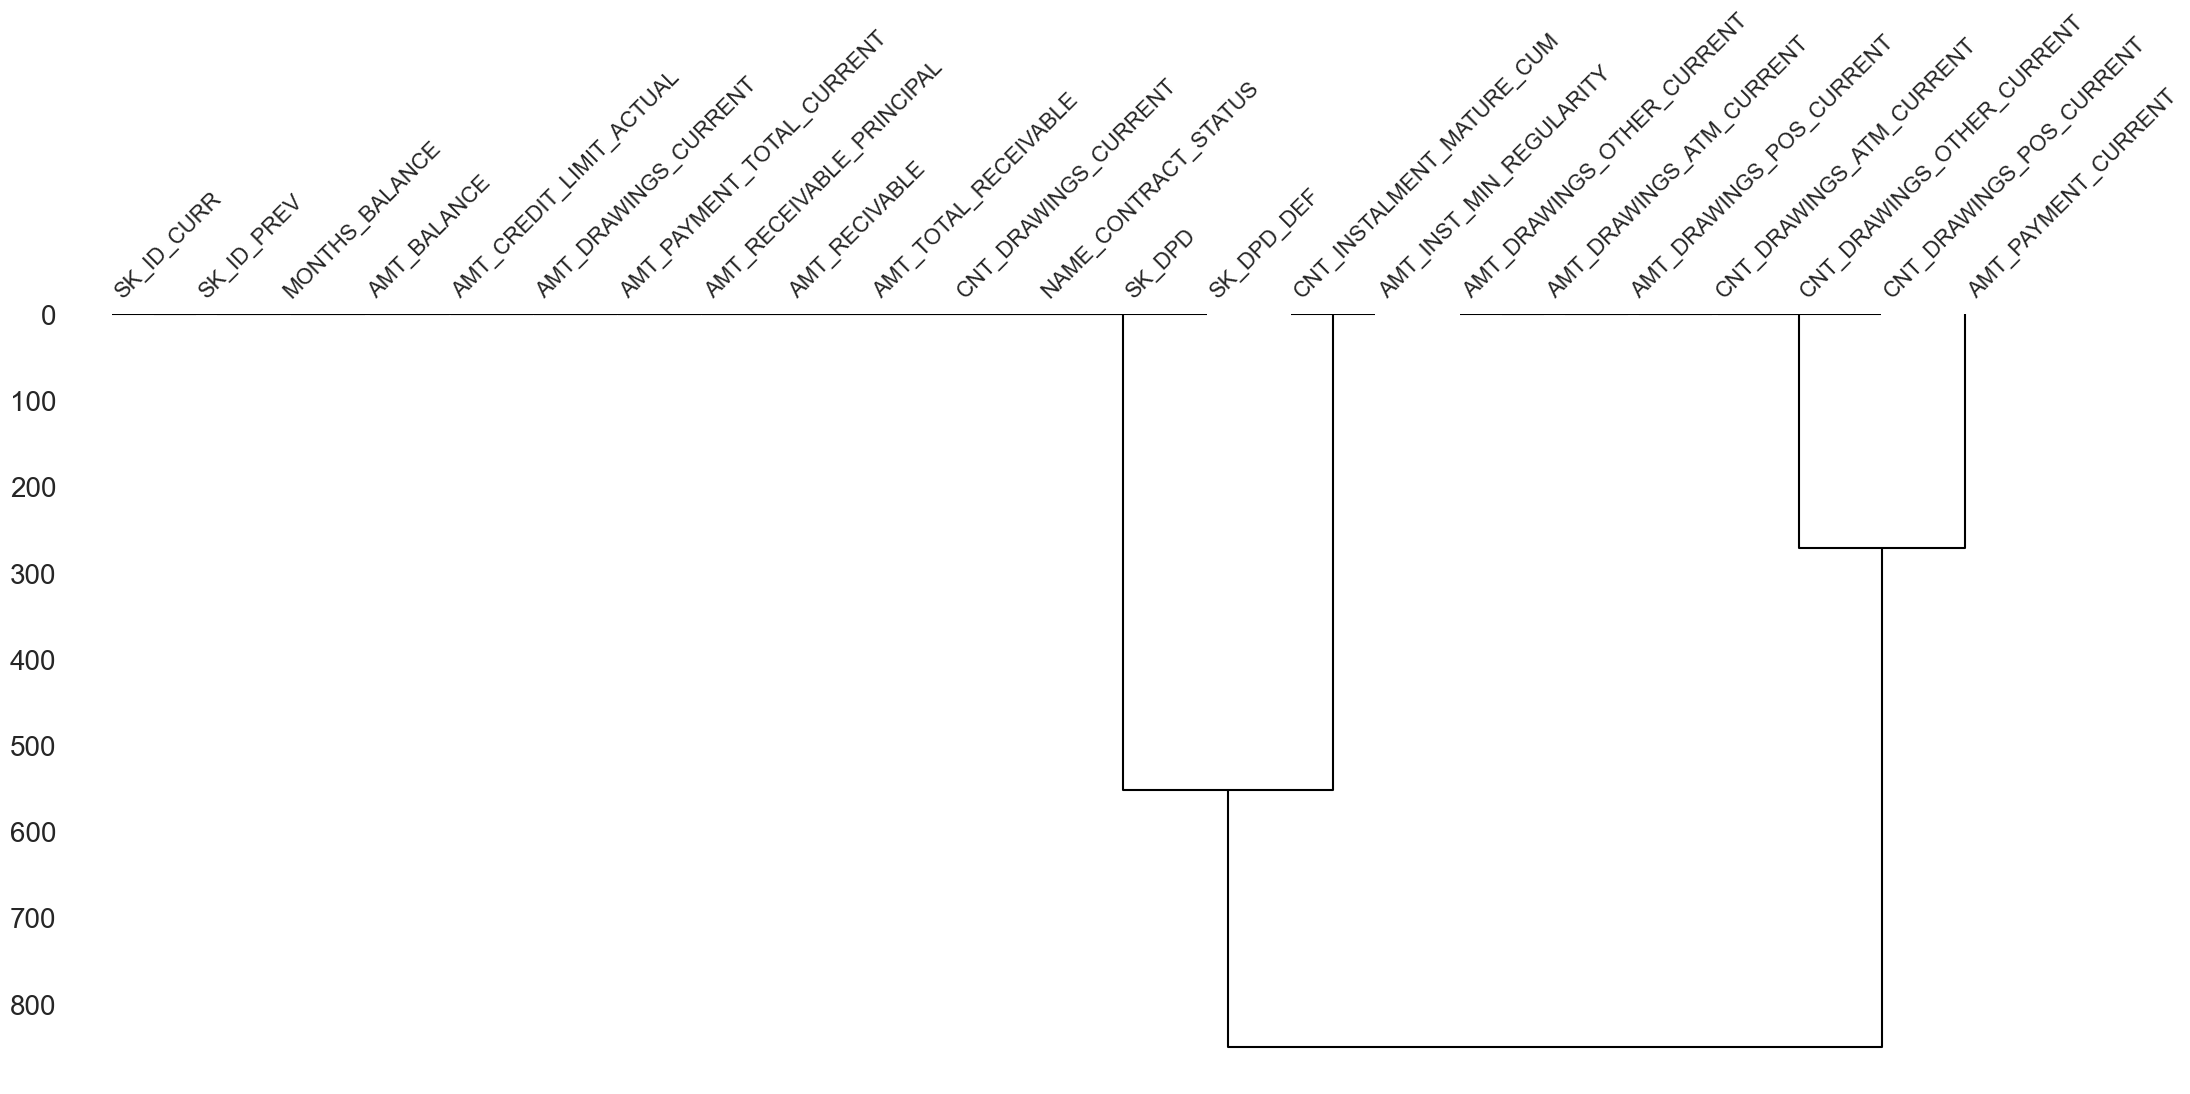

<IPython.core.display.Javascript object>

In [102]:
msno.dendrogram(df_credit_bal_mod)

There are two patterns for missing data. First missing data pairs are CNT_INSTALMENT_MATURE and AMT_INST_MIN_REGULARITY. The second groups consist the rest missing data points. There is small difference between the AMT_PAYMENT_CURRENT and the rest of the group. Two missing flag features are made for these groups.

In [103]:
credit_enc = creditpreprocess.CreditDataEncoder()

<IPython.core.display.Javascript object>

In [104]:
df_credit_bal_mod = credit_enc.flags_for_missing_vals(df_credit_bal_mod)

flags_for_missing_vals time spent 0:00:00.050625 seconds, shape = (3840312, 25)


<IPython.core.display.Javascript object>

#### 2.4.2 Outliers and anomalies checking

Then outliers and anomalies are checked from the dataset.

In [105]:
numerical_features = [
    "MONTHS_BALANCE",
    "AMT_BALANCE",
    "AMT_CREDIT_LIMIT_ACTUAL",
    "AMT_DRAWINGS_ATM_CURRENT",
    "AMT_DRAWINGS_CURRENT",
    "AMT_DRAWINGS_OTHER_CURRENT",
    "AMT_DRAWINGS_POS_CURRENT",
    "AMT_INST_MIN_REGULARITY",
    "AMT_PAYMENT_CURRENT",
    "AMT_PAYMENT_TOTAL_CURRENT",
    "AMT_RECEIVABLE_PRINCIPAL",
    "AMT_RECIVABLE",
    "AMT_TOTAL_RECEIVABLE",
    "CNT_DRAWINGS_ATM_CURRENT",
    "CNT_DRAWINGS_CURRENT",
    "CNT_DRAWINGS_OTHER_CURRENT",
    "CNT_DRAWINGS_POS_CURRENT",
    "CNT_INSTALMENT_MATURE_CUM",
    "NAME_CONTRACT_STATUS",
    "SK_DPD",
    "SK_DPD_DEF",
]

oh_columns = ["NAME_CONTRACT_STATUS"]

ord_columns = {"FLAG_MISSING_INST": [], "FLAG_MISSING_DRAWING": []}

<IPython.core.display.Javascript object>

In [106]:
pd.set_option("display.max_columns", 100)
outliers = preprocessingtools.find_outliers_IRQ(
    df_credit_bal_mod[numerical_features])
outliers.sort(key=lambda x: x[1], reverse=True)
for tpl in outliers:
    print(f"From {tpl[0]} {tpl[1]:.2%} are outliers based on 1.5 x IQR range.")

From AMT_DRAWINGS_CURRENT 16.06% are outliers based on 1.5 x IQR range.
From CNT_DRAWINGS_CURRENT 15.89% are outliers based on 1.5 x IQR range.
From AMT_DRAWINGS_ATM_CURRENT 11.06% are outliers based on 1.5 x IQR range.
From CNT_DRAWINGS_ATM_CURRENT 11.06% are outliers based on 1.5 x IQR range.
From AMT_CREDIT_LIMIT_ACTUAL 10.54% are outliers based on 1.5 x IQR range.
From AMT_PAYMENT_TOTAL_CURRENT 8.46% are outliers based on 1.5 x IQR range.
From AMT_PAYMENT_CURRENT 7.35% are outliers based on 1.5 x IQR range.
From CNT_DRAWINGS_POS_CURRENT 6.90% are outliers based on 1.5 x IQR range.
From AMT_DRAWINGS_POS_CURRENT 6.90% are outliers based on 1.5 x IQR range.
From AMT_RECEIVABLE_PRINCIPAL 6.52% are outliers based on 1.5 x IQR range.
From AMT_BALANCE 6.46% are outliers based on 1.5 x IQR range.
From AMT_RECIVABLE 6.45% are outliers based on 1.5 x IQR range.
From AMT_TOTAL_RECEIVABLE 6.44% are outliers based on 1.5 x IQR range.
From SK_DPD 3.99% are outliers based on 1.5 x IQR range.
From

<IPython.core.display.Javascript object>

Some of features have mediocre amount of outliers but no anomalies are identified and all data instances are kept.

#### 2.4.3 Aggregations

In [107]:
credit_enc.oh_columns = oh_columns
credit_enc.ord_columns = ord_columns

<IPython.core.display.Javascript object>

In [108]:
df_credit_bal_agg = credit_enc.aggregations(df_credit_bal_mod.copy())

aggregations time spent 0:00:06.217097 seconds, shape = (103558, 59)


<IPython.core.display.Javascript object>

In [109]:
df_credit_bal_agg.head()

,CC_MONTHS_BALANCE_MAX,CC_MONTHS_BALANCE_MEAN,CC_AMT_BALANCE_MAX,CC_AMT_BALANCE_MEAN,CC_AMT_CREDIT_LIMIT_ACTUAL_MAX,CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_MAX,CC_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_AMT_DRAWINGS_CURRENT_MAX,CC_AMT_DRAWINGS_CURRENT_MEAN,CC_AMT_DRAWINGS_OTHER_CURRENT_MAX,CC_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_AMT_DRAWINGS_POS_CURRENT_MAX,CC_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_AMT_INST_MIN_REGULARITY_MAX,CC_AMT_INST_MIN_REGULARITY_MEAN,CC_AMT_PAYMENT_CURRENT_MAX,CC_AMT_PAYMENT_CURRENT_MEAN,CC_AMT_PAYMENT_TOTAL_CURRENT_MAX,CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_AMT_RECEIVABLE_PRINCIPAL_MAX,CC_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_AMT_RECIVABLE_MAX,CC_AMT_RECIVABLE_MEAN,CC_AMT_TOTAL_RECEIVABLE_MAX,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_SUM,CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN,CC_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_CNT_DRAWINGS_POS_CURRENT_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_SUM,CC_CNT_INSTALMENT_MATURE_CUM_MEAN,CC_CNT_INSTALMENT_MATURE_CUM_SUM,CC_SK_DPD_MAX,CC_SK_DPD_MEAN,CC_SK_DPD_DEF_MAX,CC_SK_DPD_DEF_MEAN,CC_NAME_CONTRACT_STATUS_Active_MEAN,CC_NAME_CONTRACT_STATUS_Active_SUM,CC_NAME_CONTRACT_STATUS_Approved_MEAN,CC_NAME_CONTRACT_STATUS_Approved_SUM,CC_NAME_CONTRACT_STATUS_Completed_MEAN,CC_NAME_CONTRACT_STATUS_Completed_SUM,CC_NAME_CONTRACT_STATUS_Demand_MEAN,CC_NAME_CONTRACT_STATUS_Demand_SUM,CC_NAME_CONTRACT_STATUS_Refused_MEAN,CC_NAME_CONTRACT_STATUS_Refused_SUM,CC_NAME_CONTRACT_STATUS_Sent_proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent_proposal_SUM,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_FLAG_MISSING_INST_1_MEAN,CC_FLAG_MISSING_INST_1_SUM,CC_FLAG_MISSING_DRAWING_1_MEAN,CC_FLAG_MISSING_DRAWING_1_SUM,CC_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100006,-0.951229,-2.826144,0.000000,0.000000,256831.944615,227480.605911,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.0,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.842521,5.055125,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.842521,5.055125,6
100011,-1.763831,-4.799436,7036.794667,2651.180590,85025.979493,33228.281494,4233.194254,57.205328,4233.194254,57.205328,0.0,0.0,0.0,0.0,1048.357420,236.359835,6463.123494,429.397309,6463.123494,305.007502,6721.260453,2540.129230,7036.794667,2645.002206,7036.794667,2645.002206,0.001271,0.094071,0.001271,0.094071,0.0,0.0,0.0,0.0,7.844927,572.679694,0.000000,0.000000,0.000000,0.000000,0.244517,18.094243,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000318,0.023518,0.000000,0.000000,74
100013,-0.790056,-3.971001,3452.316345,364.480166,49870.291177,16487.483830,3231.521961,112.975985,3231.521961,105.914986,0.0,0.0,0.0,0.0,305.346887,33.222449,3270.163497,199.804349,3270.163497,142.821876,3206.522907,344.829199,3452.316345,361.862260,3452.316345,361.862260,0.004491,0.404171,0.004210,0.404171,0.0,0.0,0.0,0.0,4.700752,418.366898,0.031746,0.000331,0.031746,0.000331,0.201496,19.343652,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000701,0.067266,0.000585,0.056157,96
100021,-1.809675,-5.507942,0.000000,0.000000,610765.257174,421800.937966,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.0,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195478,3.323123,0.0,0.0,0.429412,7.300012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.624890,10.623135,17
100023,-3.274923,-5.007453,0.000000,0.000000,184214.419443,99599.725690,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.0,NaN,0.0,0.000000,0.000000,0.00

<IPython.core.display.Javascript object>

In [110]:
df_comb = pd.merge(
    left=df_comb,
    right=df_credit_bal_agg,
    left_on="SK_ID_CURR",
    right_index=True,
    how="left",
)

<IPython.core.display.Javascript object>

In [111]:
df_comb.head()

,SK_ID_CURR,TARGET,CODE_GENDER_f,FLAG_OWN_CAR_y,FLAG_OWN_REALTY_y,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION_1,REG_REGION_NOT_WORK_REGION_1,LIVE_REGION_NOT_WORK_REGION_1,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,...,CC_AMT_DRAWINGS_CURRENT_MEAN,CC_AMT_DRAWINGS_OTHER_CURRENT_MAX,CC_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_AMT_DRAWINGS_POS_CURRENT_MAX,CC_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_AMT_INST_MIN_REGULARITY_MAX,CC_AMT_INST_MIN_REGULARITY_MEAN,CC_AMT_PAYMENT_CURRENT_MAX,CC_AMT_PAYMENT_CURRENT_MEAN,CC_AMT_PAYMENT_TOTAL_CURRENT_MAX,CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_AMT_RECEIVABLE_PRINCIPAL_MAX,CC_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_AMT_RECIVABLE_MAX,CC_AMT_RECIVABLE_MEAN,CC_AMT_TOTAL_RECEIVABLE_MAX,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_SUM,CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN,CC_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_CNT_DRAWINGS_POS_CURRENT_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_SUM,CC_CNT_INSTALMENT_MATURE_CUM_MEAN,CC_CNT_INSTALMENT_MATURE_CUM_SUM,CC_SK_DPD_MAX,CC_SK_DPD_MEAN,CC_SK_DPD_DEF_MAX,CC_SK_DPD_DEF_MEAN,CC_NAME_CONTRACT_STATUS_Active_MEAN,CC_NAME_CONTRACT_STATUS_Active_SUM,CC_NAME_CONTRACT_STATUS_Approved_MEAN,CC_NAME_CONTRACT_STATUS_Approved_SUM,CC_NAME_CONTRACT_STATUS_Completed_MEAN,CC_NAME_CONTRACT_STATUS_Completed_SUM,CC_NAME_CONTRACT_STATUS_Demand_MEAN,CC_NAME_CONTRACT_STATUS_Demand_SUM,CC_NAME_CONTRACT_STATUS_Refused_MEAN,CC_NAME_CONTRACT_STATUS_Refused_SUM,CC_NAME_CONTRACT_STATUS_Sent_proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent_proposal_SUM,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_FLAG_MISSING_INST_1_MEAN,CC_FLAG_MISSING_INST_1_SUM,CC_FLAG_MISSING_DRAWING_1_MEAN,CC_FLAG_MISSING_DRAWING_1_SUM,CC_COUNT
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-2120,NaN,1.0,1,1,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-291,NaN,2.0,0,0,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-2531,26.0,1.0,1,1,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,1,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-2437,NaN,2.0,1,1,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

<IPython.core.display.Javascript object>

In [112]:
df_comb.shape

(307503, 513)

<IPython.core.display.Javascript object>

### 2.5 Previous point of sales

Then the data from previous point of sales is investigated.

In [113]:
df_pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


<IPython.core.display.Javascript object>

In [114]:
df_pos_mod = (
    df_pos.pipe(commonpipeline.start_cleaning_pipeline)
    .pipe(commonpipeline.remove_columns, columns_to_drop=[])
    .pipe(commonpipeline.remove_duplicates)
    .pipe(commonpipeline.clean_column_names)
)

start_cleaning_pipeline spent 0:00:00.573000 seconds, shape = (10001358, 8)
remove_columns spent 0:00:00.251469 seconds, shape = (10001358, 8)
remove_duplicates spent 0:00:04.061379 seconds, shape = (10001358, 8)
clean_column_names spent 0:00:00 seconds, shape = (10001358, 8)


<IPython.core.display.Javascript object>

#### 2.5.1 Checking missing values

Here, the missing values are checked from the previous point of sale datasets.

Total number of null values in data: 52158
Number of null values per column:
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
dtype: int64


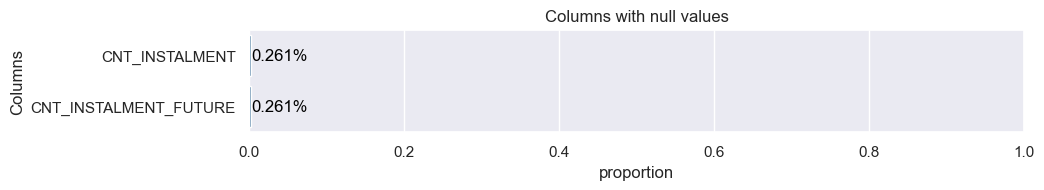

<IPython.core.display.Javascript object>

In [115]:
preprocessingtools.check_null_values(df_pos_mod)

#### 2.5.2 Outliers and anomalies checking

Then outliers and anomalies are checked from the dataset.

In [116]:
numerical_features = [
    "MONTHS_BALANCE",
    "CNT_INSTALMENT",
    "CNT_INSTALMENT_FUTURE",
    "SK_DPD",
    "SK_DPD_DEF",
]

oh_columns = ["NAME_CONTRACT_STATUS"]

ord_columns = {}

<IPython.core.display.Javascript object>

In [117]:
pd.set_option("display.max_columns", 100)
outliers = preprocessingtools.find_outliers_IRQ(df_pos_mod[numerical_features])
outliers.sort(key=lambda x: x[1], reverse=True)
for tpl in outliers:
    print(f"From {tpl[0]} {tpl[1]:.2%} are outliers based on 1.5 x IQR range.")

From CNT_INSTALMENT_FUTURE 6.95% are outliers based on 1.5 x IQR range.
From CNT_INSTALMENT 4.99% are outliers based on 1.5 x IQR range.
From SK_DPD 2.95% are outliers based on 1.5 x IQR range.
From SK_DPD_DEF 1.14% are outliers based on 1.5 x IQR range.
From MONTHS_BALANCE 0.00% are outliers based on 1.5 x IQR range.


<IPython.core.display.Javascript object>

There are few outliers but no anomalies are detecked and all data instances are kept.

#### 2.5.3 Aggregations

In [118]:
pos_enc = pospreprocess.POSDataEncoder(oh_columns=oh_columns)

<IPython.core.display.Javascript object>

In [119]:
df_pos_agg = pos_enc.fit_transform(df_pos_mod)

aggregations time spent 0:00:07.249861 seconds, shape = (337252, 29)


<IPython.core.display.Javascript object>

In [120]:
df_pos_agg.head()

,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_CNT_INSTALMENT_MEAN,POS_CNT_INSTALMENT_SUM,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_CNT_INSTALMENT_FUTURE_SUM,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,POS_NAME_CONTRACT_STATUS_Active_SUM,POS_NAME_CONTRACT_STATUS_Amortized_debt_MEAN,POS_NAME_CONTRACT_STATUS_Amortized_debt_SUM,POS_NAME_CONTRACT_STATUS_Approved_MEAN,POS_NAME_CONTRACT_STATUS_Approved_SUM,POS_NAME_CONTRACT_STATUS_Canceled_MEAN,POS_NAME_CONTRACT_STATUS_Canceled_SUM,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Completed_SUM,POS_NAME_CONTRACT_STATUS_Demand_MEAN,POS_NAME_CONTRACT_STATUS_Demand_SUM,POS_NAME_CONTRACT_STATUS_Returned_to_the_store_MEAN,POS_NAME_CONTRACT_STATUS_Returned_to_the_store_SUM,POS_NAME_CONTRACT_STATUS_Signed_MEAN,POS_NAME_CONTRACT_STATUS_Signed_SUM,POS_NAME_CONTRACT_STATUS_XNA_MEAN,POS_NAME_CONTRACT_STATUS_XNA_SUM,POS_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,-0.790056,-2.327587,0.158212,1.423909,0.070442,0.633980,0.060562,0.006729,0.060562,0.006729,0.030640,0.275764,0.0,0.0,0.0,0.0,0.0,0.0,0.008913,0.080213,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,9
100002,-0.951229,-5.364965,15.108764,287.066524,8.512624,161.739853,0.000000,0.000000,0.000000,0.000000,0.629532,11.961105,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,19
100003,-1.638540,-4.996440,1.758387,49.234831,1.009599,28.268764,0.000000,0.000000,0.000000,0.000000,0.167806,4.698556,0.0,0.0,0.0,0.0,0.0,0.0,0.027018,0.756507,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,28
100004,-6.999487,-7.119149,1.044173,4.176690,0.606892,2.427566,0.000000,0.000000,0.000000,0.000000,0.204569,0.818277,0.0,0.0,0.0,0.0,0.0,0.0,0.075299,0.301194,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,4
100005,-7.085498,-7.264593,4.431418,44.314185,2.559952,25.599517,0.000000,0.000000,0.000000,0.000000,0.303507,3.338574,0.0,0.0,0.0,0.0,0.0,0.0,0.042942,0.472367,0.0,0.0,0.0,0.0,0.026046,0.286505,0.0,0.0,11


<IPython.core.display.Javascript object>

In [121]:
df_comb = pd.merge(
    left=df_comb,
    right=df_pos_agg,
    left_on="SK_ID_CURR",
    right_index=True,
    how="left",
)

<IPython.core.display.Javascript object>

In [122]:
df_comb.head()

,SK_ID_CURR,TARGET,CODE_GENDER_f,FLAG_OWN_CAR_y,FLAG_OWN_REALTY_y,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION_1,REG_REGION_NOT_WORK_REGION_1,LIVE_REGION_NOT_WORK_REGION_1,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,...,CC_SK_DPD_DEF_MAX,CC_SK_DPD_DEF_MEAN,CC_NAME_CONTRACT_STATUS_Active_MEAN,CC_NAME_CONTRACT_STATUS_Active_SUM,CC_NAME_CONTRACT_STATUS_Approved_MEAN,CC_NAME_CONTRACT_STATUS_Approved_SUM,CC_NAME_CONTRACT_STATUS_Completed_MEAN,CC_NAME_CONTRACT_STATUS_Completed_SUM,CC_NAME_CONTRACT_STATUS_Demand_MEAN,CC_NAME_CONTRACT_STATUS_Demand_SUM,CC_NAME_CONTRACT_STATUS_Refused_MEAN,CC_NAME_CONTRACT_STATUS_Refused_SUM,CC_NAME_CONTRACT_STATUS_Sent_proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent_proposal_SUM,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_FLAG_MISSING_INST_1_MEAN,CC_FLAG_MISSING_INST_1_SUM,CC_FLAG_MISSING_DRAWING_1_MEAN,CC_FLAG_MISSING_DRAWING_1_SUM,CC_COUNT,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_CNT_INSTALMENT_MEAN,POS_CNT_INSTALMENT_SUM,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_CNT_INSTALMENT_FUTURE_SUM,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,POS_NAME_CONTRACT_STATUS_Active_SUM,POS_NAME_CONTRACT_STATUS_Amortized_debt_MEAN,POS_NAME_CONTRACT_STATUS_Amortized_debt_SUM,POS_NAME_CONTRACT_STATUS_Approved_MEAN,POS_NAME_CONTRACT_STATUS_Approved_SUM,POS_NAME_CONTRACT_STATUS_Canceled_MEAN,POS_NAME_CONTRACT_STATUS_Canceled_SUM,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Completed_SUM,POS_NAME_CONTRACT_STATUS_Demand_MEAN,POS_NAME_CONTRACT_STATUS_Demand_SUM,POS_NAME_CONTRACT_STATUS_Returned_to_the_store_MEAN,POS_NAME_CONTRACT_STATUS_Returned_to_the_store_SUM,POS_NAME_CONTRACT_STATUS_Signed_MEAN,POS_NAME_CONTRACT_STATUS_Signed_SUM,POS_NAME_CONTRACT_STATUS_XNA_MEAN,POS_NAME_CONTRACT_STATUS_XNA_SUM,POS_COUNT
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-2120,NaN,1.0,1,1,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.951229,-5.364965,15.108764,287.066524,8.512624,161.739853,0.0,0.0,0.0,0.0,0.629532,11.961105,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,19.0
1,100003,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-291,NaN,2.0,0,0,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.638540,-4.996440,1.758387,49.234831,1.009599,28.268764,0.0,0.0,0.0,0.0,0.167806,4.698556,0.0,0.0,0.0,0.0,0.0,0.0,0.027018,0.756507,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,28.0
2,100004,0,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-2531,26.0,1.0,1,1,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.999487,-7.119149,1.044173,4.17669

<IPython.core.display.Javascript object>

In [123]:
df_comb.shape

(307503, 542)

<IPython.core.display.Javascript object>

### 2.6 Credit bureau data

Here the credit bureau history data is investigated.

In [137]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


<IPython.core.display.Javascript object>

In [138]:
df_bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


<IPython.core.display.Javascript object>

In [139]:
df_bureau_mod = (
    df_bureau.pipe(commonpipeline.start_cleaning_pipeline)
    .pipe(commonpipeline.remove_duplicates)
    .pipe(commonpipeline.clean_column_names)
)

start_cleaning_pipeline spent 0:00:00.046902 seconds, shape = (1716428, 17)
remove_duplicates spent 0:00:01.791057 seconds, shape = (1716428, 17)
clean_column_names spent 0:00:00 seconds, shape = (1716428, 17)


<IPython.core.display.Javascript object>

In [140]:
df_bureau_bal_mod = (
    df_bureau_bal.pipe(commonpipeline.start_cleaning_pipeline)
    .pipe(commonpipeline.remove_duplicates)
    .pipe(commonpipeline.clean_column_names)
)

start_cleaning_pipeline spent 0:00:00.152881 seconds, shape = (27299925, 3)
remove_duplicates spent 0:00:06.274428 seconds, shape = (27299925, 3)
clean_column_names spent 0:00:00 seconds, shape = (27299925, 3)


<IPython.core.display.Javascript object>

#### 2.6.1 Checking missing values

Here, the missing values are checked from the bureau datasets.

Total number of null values in data: 3939947
Number of null values per column:
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_ANNUITY               1226791
dtype: int64


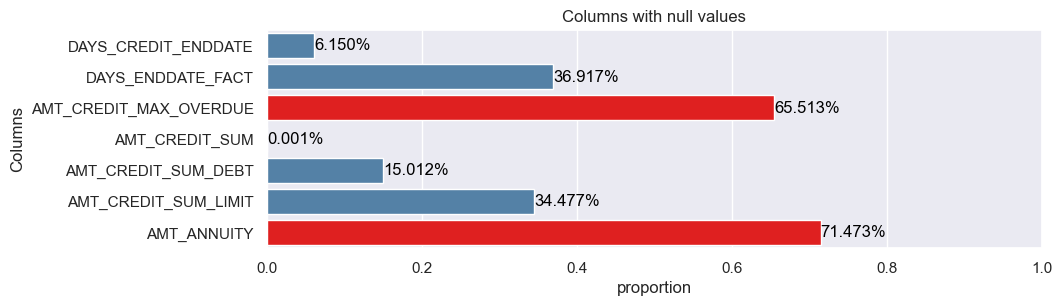

<IPython.core.display.Javascript object>

In [141]:
preprocessingtools.check_null_values(df_bureau_mod)

<Axes: >

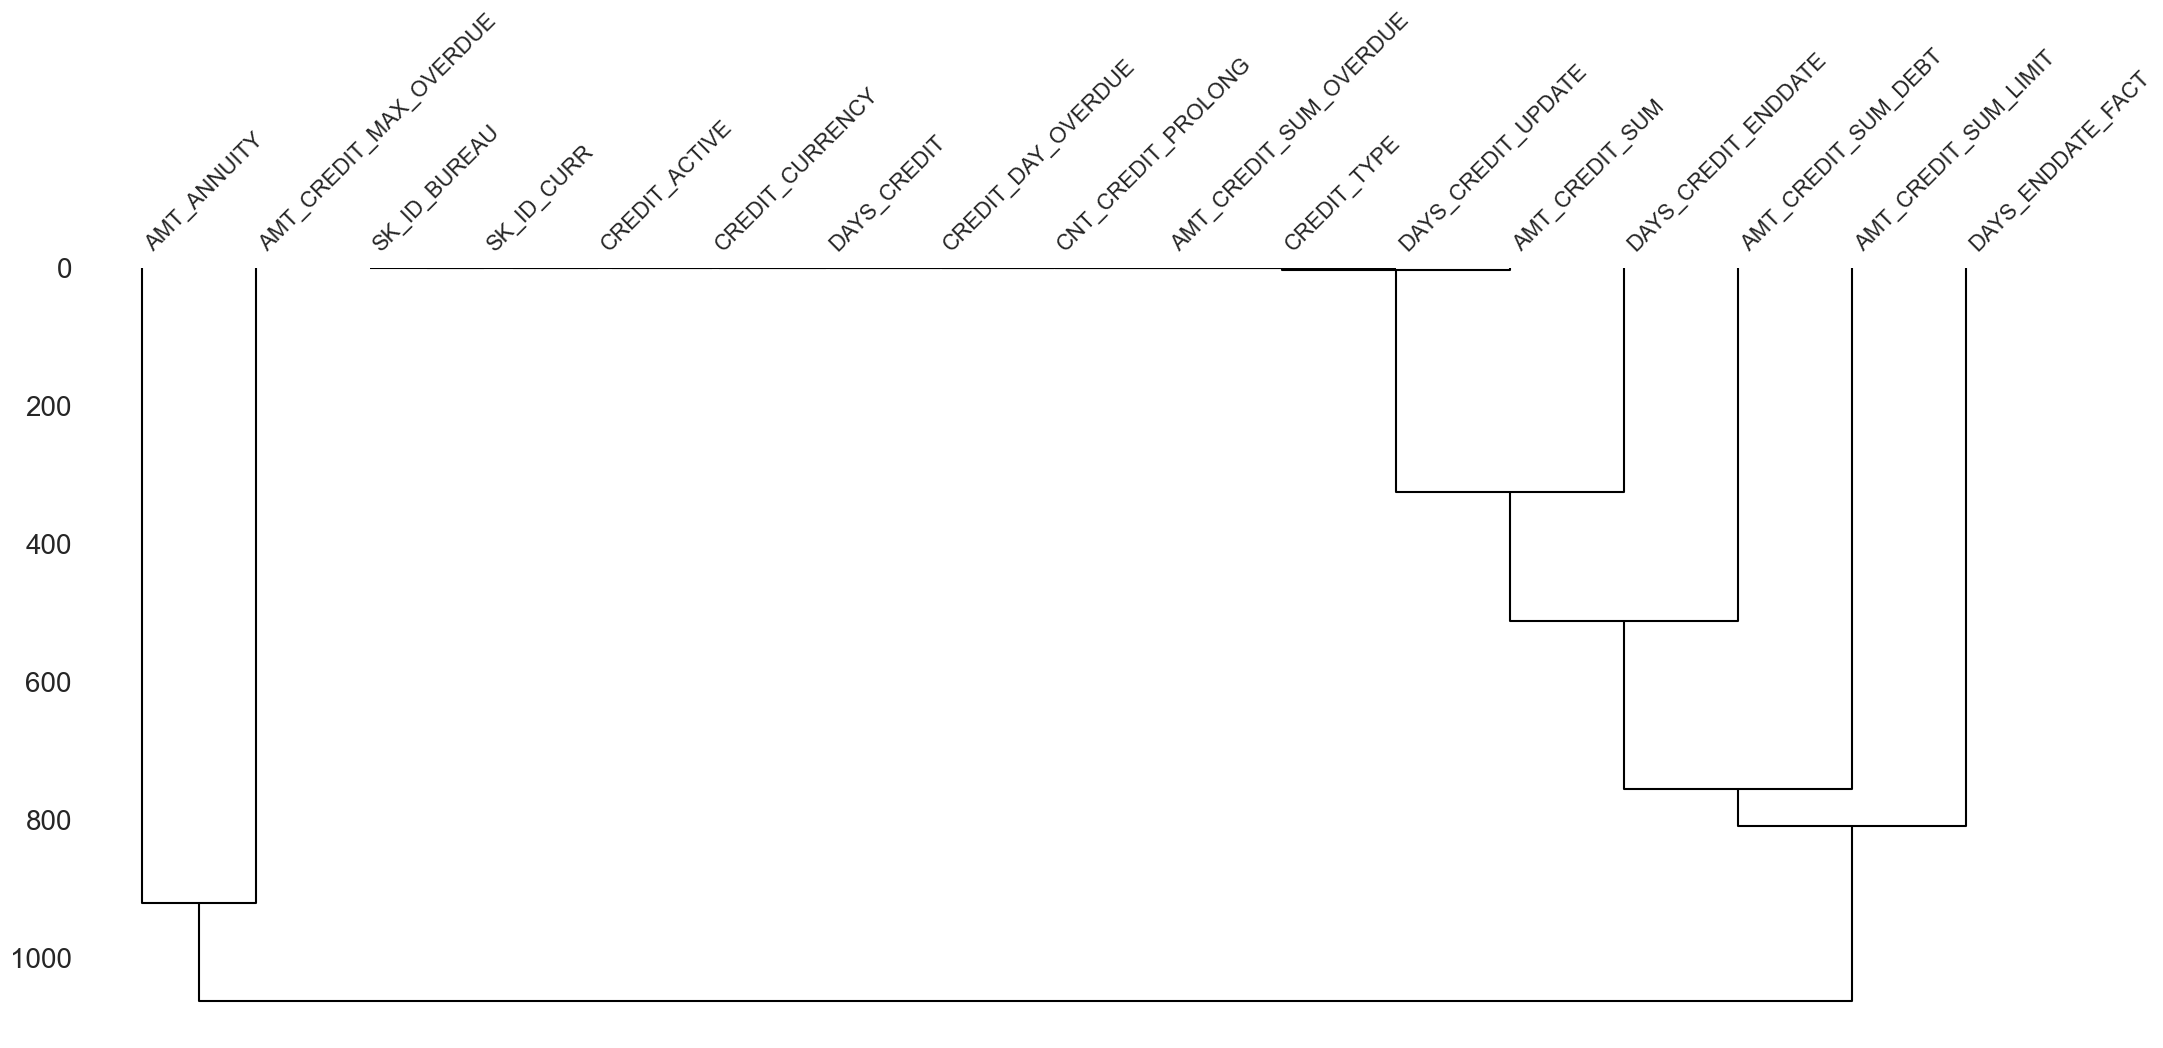

<IPython.core.display.Javascript object>

In [142]:
msno.dendrogram(df_bureau_mod)

It seems that there are two different patterns for missing values but the connection between the missing values is not that strong. Let's create missing flags for AMT_ANNUITY and AMT_CREDIT_MAX_OVERDUE and a ratio of missing values for the variables in the right.

In [143]:
bureau_enc = bureaupreprocess.BureauDataEncoder()

<IPython.core.display.Javascript object>

In [144]:
df_bureau_mod = bureau_enc.flags_for_missing_vals(df_bureau_mod)

flags_for_missing_vals time spent 0:00:00.155833 seconds, shape = (1716428, 20)


<IPython.core.display.Javascript object>

In [145]:
preprocessingtools.check_null_values(df_bureau_bal_mod)

Total number of null values in data: 0


<IPython.core.display.Javascript object>

There is no missing values in the bureau balance dataset.

#### 2.6.3 Outliers and anomalies checking

Next, outliers and anomalies are checked.

In [146]:
numerical_features = [
    "DAYS_CREDIT",
    "CREDIT_DAY_OVERDUE",
    "DAYS_CREDIT_ENDDATE",
    "DAYS_ENDDATE_FACT",
    "AMT_CREDIT_MAX_OVERDUE",
    "CNT_CREDIT_PROLONG",
    "AMT_CREDIT_SUM",
    "AMT_CREDIT_SUM_DEBT",
    "AMT_CREDIT_SUM_LIMIT",
    "AMT_CREDIT_SUM_OVERDUE",
    "DAYS_CREDIT_UPDATE",
    "AMT_ANNUITY",
]

categorical_features = [
    "CREDIT_ACTIVE",
    "CREDIT_CURRENCY",
    "CREDIT_TYPE",
]

<IPython.core.display.Javascript object>

In [147]:
pd.set_option("display.max_columns", 100)
outliers = preprocessingtools.find_outliers_IRQ(
    df_bureau_mod[numerical_features])
outliers.sort(key=lambda x: x[1], reverse=True)
for tpl in outliers:
    print(f"From {tpl[0]} {tpl[1]:.2%} are outliers based on 1.5 x IQR range.")

From AMT_CREDIT_SUM_DEBT 16.34% are outliers based on 1.5 x IQR range.
From AMT_CREDIT_SUM 10.95% are outliers based on 1.5 x IQR range.
From AMT_CREDIT_MAX_OVERDUE 7.07% are outliers based on 1.5 x IQR range.
From DAYS_CREDIT_ENDDATE 4.62% are outliers based on 1.5 x IQR range.
From AMT_CREDIT_SUM_LIMIT 4.34% are outliers based on 1.5 x IQR range.
From DAYS_CREDIT_UPDATE 3.71% are outliers based on 1.5 x IQR range.
From AMT_ANNUITY 2.56% are outliers based on 1.5 x IQR range.
From CNT_CREDIT_PROLONG 0.53% are outliers based on 1.5 x IQR range.
From CREDIT_DAY_OVERDUE 0.25% are outliers based on 1.5 x IQR range.
From AMT_CREDIT_SUM_OVERDUE 0.24% are outliers based on 1.5 x IQR range.
From DAYS_ENDDATE_FACT 0.00% are outliers based on 1.5 x IQR range.
From DAYS_CREDIT 0.00% are outliers based on 1.5 x IQR range.


<IPython.core.display.Javascript object>

Next, some of extreme values are investigated and removed if necessary.

In [148]:
print(
    f"Number of data instances with Credit sum debt: {((df_bureau_mod.AMT_CREDIT_SUM_DEBT > 15000000) | (df_bureau_mod.AMT_CREDIT_SUM_DEBT < -4705601)).sum()}"
)
df_bureau_mod = preprocessingtools.drop_rows_outside_range(
    df_bureau_mod, "AMT_CREDIT_SUM_DEBT", 15000000, -4705601
)

Number of data instances with Credit sum debt: 262
Number of data instances removed: 262


<IPython.core.display.Javascript object>

In [149]:
print(
    f"Number of data instances with Credit sum: {(df_bureau_mod.AMT_CREDIT_SUM > 500000000).sum()}"
)
df_bureau_mod = preprocessingtools.drop_rows_outside_range(
    df_bureau_mod, "AMT_CREDIT_SUM", 500000000, 0
)

Number of data instances with Credit sum: 1
Number of data instances removed: 1


<IPython.core.display.Javascript object>

Next, categorical features are investigated. Categories that are too small are combined to other categories.

In [150]:
print("Total number of classes per feature:")
df_bureau_mod[categorical_features].apply(pd.Series.nunique, axis=0)

Total number of classes per feature:


CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64

<IPython.core.display.Javascript object>

In [151]:
df_bureau_mod = bureau_enc.combining_rare_categories(
    df_bureau_mod, "CREDIT_TYPE")

combining_rare_categories time spent 0:00:00.332355 seconds, shape = (1716165, 20)


<IPython.core.display.Javascript object>

In [152]:
df_bureau_mod.CREDIT_TYPE.value_counts(normalize=False)

CREDIT_TYPE
Consumer credit                  1251601
Credit card                       402194
Car loan                           27690
Mortgage                           18144
Microloan                          12413
Other                               2149
Loan for business development       1974
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [153]:
df_bureau_mod.CREDIT_ACTIVE.value_counts(normalize=False)

CREDIT_ACTIVE
Closed      1079271
Active       630350
Sold           6523
Bad debt         21
Name: count, dtype: int64

<IPython.core.display.Javascript object>

#### 2.6.3 Feature engineeging

Here, few new features are engineered and the dataset is aggregated. New features include e.g. credit debt rate and count of open credits.

In [154]:
bureau_enc.oh_columns = ["CREDIT_TYPE", "CREDIT_CURRENCY", "CREDIT_ACTIVE"]

<IPython.core.display.Javascript object>

In [155]:
df_bureau_mod = bureau_enc.feature_engineering(df_bureau_mod)

feature_engineering time spent 0:00:00.080295 seconds, shape = (1716165, 22)


<IPython.core.display.Javascript object>

In [156]:
df_bureau_agg = bureau_enc.aggregations(
    df_bureau_mod.copy(), weight=0.05, X_balance=df_bureau_bal_mod.copy()
)

aggregate_balance time spent 0:00:06.934144 seconds, shape = (817395, 19)


<IPython.core.display.Javascript object>

In [157]:
df_comb = pd.merge(
    left=df_comb,
    right=df_bureau_agg,
    left_on="SK_ID_CURR",
    right_index=True,
    how="left",
)

<IPython.core.display.Javascript object>

In [158]:
df_comb.head()

,SK_ID_CURR,TARGET,CODE_GENDER_f,FLAG_OWN_CAR_y,FLAG_OWN_REALTY_y,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION_1,REG_REGION_NOT_WORK_REGION_1,LIVE_REGION_NOT_WORK_REGION_1,REG_CITY_NOT_LIVE_CITY_1,REG_CITY_NOT_WORK_CITY_1,LIVE_CITY_NOT_WORK_CITY_1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,...,ACTIVE_FLAG_MISSING_AMT_ANNUITY_MAX,ACTIVE_FLAG_MISSING_CREDIT_MAX_OVERDUE_MEAN,ACTIVE_FLAG_MISSING_CREDIT_MAX_OVERDUE_MAX,ACTIVE_CREDIT_INFO_MISSING_RATIO_MEAN,ACTIVE_CREDIT_INFO_MISSING_RATIO_MAX,ACTIVE_AMT_CREDIT_DEBT_RATE_MEAN,ACTIVE_AMT_CREDIT_DEBT_RATE_MAX,ACTIVE_FLAG_ACTIVE_CREDIT_MEAN,ACTIVE_FLAG_ACTIVE_CREDIT_MAX,ACTIVE_MONTHS_BALANCE_MIN_MIN,ACTIVE_MONTHS_BALANCE_MAX_MAX,ACTIVE_MONTHS_BALANCE_SIZE_MEAN,ACTIVE_MONTHS_BALANCE_SIZE_MAX,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_MAX,CLOSED_CREDIT_DAY_OVERDUE_MEAN,CLOSED_CREDIT_DAY_OVERDUE_MAX,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_ENDDATE_FACT_MEAN,CLOSED_DAYS_ENDDATE_FACT_MAX,CLOSED_AMT_CREDIT_MAX_OVERDUE_MEAN,CLOSED_AMT_CREDIT_MAX_OVERDUE_MAX,CLOSED_CNT_CREDIT_PROLONG_SUM,CLOSED_AMT_CREDIT_SUM_MEAN,CLOSED_AMT_CREDIT_SUM_MAX,CLOSED_AMT_CREDIT_SUM_DEBT_MEAN,CLOSED_AMT_CREDIT_SUM_DEBT_MAX,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_MAX,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_OVERDUE_MAX,CLOSED_DAYS_CREDIT_UPDATE_MEAN,CLOSED_DAYS_CREDIT_UPDATE_MAX,CLOSED_AMT_ANNUITY_MEAN,CLOSED_AMT_ANNUITY_MAX,CLOSED_FLAG_MISSING_AMT_ANNUITY_MEAN,CLOSED_FLAG_MISSING_AMT_ANNUITY_MAX,CLOSED_FLAG_MISSING_CREDIT_MAX_OVERDUE_MEAN,CLOSED_FLAG_MISSING_CREDIT_MAX_OVERDUE_MAX,CLOSED_CREDIT_INFO_MISSING_RATIO_MEAN,CLOSED_CREDIT_INFO_MISSING_RATIO_MAX,CLOSED_AMT_CREDIT_DEBT_RATE_MEAN,CLOSED_AMT_CREDIT_DEBT_RATE_MAX,CLOSED_FLAG_ACTIVE_CREDIT_MEAN,CLOSED_FLAG_ACTIVE_CREDIT_MAX,CLOSED_MONTHS_BALANCE_MIN_MIN,CLOSED_MONTHS_BALANCE_MAX_MAX,CLOSED_MONTHS_BALANCE_SIZE_MEAN,CLOSED_MONTHS_BALANCE_SIZE_MAX
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-2120,NaN,1.0,1,1,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,...,0.0,0.5,1.0,0.375,0.50,0.273089,0.546179,1.0,1.0,-34.0,0.0,10.0,16.0,-974.500000,-476.0,0.0,0.0,-574.800000,85.0,-697.500000,-36.0,2091.16125,5043.645,0.0,63844.5,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,-661.333333,-34.0,0.0,0.0,0.166667,1.0,0.333333,1.0,0.333333,0.5,0.0,0.0,0.0,0.0,-47.0,0.0,15.0,22.0
1,100003,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-291,NaN,2.0,0,0,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,...,1.0,0.0,0.0,0.250,0.25,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,NaN,-1665.666667,-775.0,0.0,0.0,-1131.333333,-420.0,-1097.333333,-540.0,0.00000,0.000,0.0,69133.5,112500.0,0.0,0.0,0.0,0.0,0.0,0.0,-1073.666667,-540.0,NaN,NaN,1.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,100004,0,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-2531,26.0,1.0,1,1,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-867.000000,-408.0,0.0,0.0,-488.500000,-382.0,-

<IPython.core.display.Javascript object>

In [159]:
df_comb.shape

(307503, 715)

<IPython.core.display.Javascript object>

## 3. Exporting preprocessed data

Finally all the data is preprocessed. Now the flag feature is created for clients for whom historical data is missing. Then the dataset is exported as .csv file for data analysis part and model training.

In [160]:
df_export = bureau_enc.flag_missing_values_aggregated(df_comb.copy())

flag_missing_values_aggregated time spent 0:00:00.787813 seconds, shape = (307503, 723)


<IPython.core.display.Javascript object>

In [161]:
df_export = df_export.drop(columns="SK_ID_CURR")

<IPython.core.display.Javascript object>

In [162]:
df_export.to_csv("HomeCreditData_preprocessed.csv", index=False)